In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mtptlib
from scipy import log10,log 
from astropy import constants as cons, units as u
from matplotlib import gridspec
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from scipy.optimize import curve_fit
from scipy import stats

plt.matplotlib.rc('text', usetex=True)
plt.matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#import sensitivity_curve
dir1 ='/Users/themba/Documents/MSc/Thesis/Write_up/Thesis/Figures/'
from matplotlib.ticker import AutoMinorLocator
Automated_Color = 'plum'
SoFiA_color = Automated_Color
VnSA_color,SA_color,V_color = 'lightblue','plum','lightgreen'
mtptlib.mathtext.SHRINK_FACTOR = 0.8  #increase subscript font

dir11= '/Volumes/Themba/MSc/SoFiA_Dec/'
S4C  = pd.read_csv(dir11+'SoFiACat_4Sig',sep='\t')    #SoFiA 4.0 Sigma catalog
S35C = pd.read_csv(dir11+'SoFiACat_35Sig',sep='\t')   #SoFiA 3.5 Sigma catalog
S3C  = pd.read_csv(dir11+'SofiaCat_3sig',sep='\t')   #SoFiA 3.0 Sigma catalog
sofia=S35C.rename(columns={'f_peak':'Peak','f_int':'Flux','massC':'Mass'})
automated=sofia[(sofia.w20<600)&(sofia.Flux>0)]
dir2 = '../Write_up/Thesis/Figures/'

srt_sofia = pd.read_csv('/Users/themba/Documents/MSc/Thesis/Catalogue/FINAL_PRODUCT/sofia_srt_catalog', sep='\t')
srt_sofia = srt_sofia.rename(columns={'f_peak':'Peak','f_int':'Flux','massC':'Mass'})
srt_sofia = srt_sofia.drop([108,111,112,115,120,128,141])#54,80,

SRTWV = pd.read_csv('/Users/themba/Documents/MSc/Thesis/Catalogue/FINAL_PRODUCT/SRTWV-catalog', sep='\t')
VWSRT = pd.read_csv('/Users/themba/Documents/MSc/Thesis/Catalogue/FINAL_PRODUCT/VWSRT-catalog', sep='\t')

/Users/themba/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
c = (cons.c).to(u.km/u.s)
#visual = pd.read_csv('../Catalogue/FINAL_PRODUCT/Visual-catalog', sep='\t')#,index_col=0
visual = pd.read_csv('../Catalogue/FINAL_PRODUCT/Visual-catalog_srt', sep='\t')#,index_col=0
Vsorted = pd.read_csv('../Catalogue/FINAL_PRODUCT/VisualCatalogSorted', sep='\t')
SemiAutomated = pd.read_csv('../Catalogue/FINAL_PRODUCT/SemiAutomated-catalog', sep='\t')
#visual['Flux']=log10(visual.Flux)
#visual['Peak']=log10(visual.Peak)
variables=visual.columns[5:]
variables=variables.drop('D')
xlabel=[r'$V_{{rad}}\,\,\left[\mathrm{km\,s^{-1}}\right]$',r'$W_{{20}}\,\,\left[\mathrm{km\,s^{-1}}\right]$',r'$W_{{50}}\,\,\left[\mathrm{km\,s^{-1}}\right]$',
        r'$\log\,\left(S_{{peak}}/\mathrm{mJy}\right)$',
   r'$\log\,\left(S_{{int}}/\mathrm{Jy\,km\,s^{-1}}\right)$',r'$\log\,\left(M_{{HI}}/M_{{\odot}}\right)$']

ylabel=[r'N$\,\left(V_{{rad}}\right)$',r'N$\,\left(W_{{20}}\right)$',r'N$\,\left(W_{{50}}\right)$',
        r'N$\,\left(S_{{peak}}\right)$',r'N$\,\left(S_{{int}}\right)$',r'N$\,\left(M_{{HI}}\right)$']

visual['z'] = visual.vel/c.value
SemiAutomated['z'] = SemiAutomated.vel/c.value

hist=[visual.Flux,visual.Peak,log10(visual.w50),visual.z]
Ylabel=[r'$\mathrm{N\,\left(S_{int}\right)}$',r'$\mathrm{N\,\left(S_{peak}\right)}$',r'$\mathrm{N\,\left(W_{50}\right)}$',
        r'$\mathrm{N\,\left(z\right)}$']
Label=[r'$\mathrm{\log\,\,S_{{int}}\,\,\left[Jy\,km\,s^{-1}\right]}$',r'$\mathrm{\log\,\,S_{{peak}}\,\,\left[Jy \right]}$',
      r'$\mathrm{\log\,\,W_{50}\,\,\left[km\,s^{-1} \right]}$',r'$z$']

In [3]:
def SNR(visual):   #Calculate SNR
    snr = ((1e3*visual.Flux)/visual.w50)*(np.sqrt((visual.w50/2*8.24)/0.4*1e-3))
    return snr
snr=SNR(visual)
visual['snr'] = snr

snr1=SNR(automated)
automated['snr']=snr1

snr2=SNR(SemiAutomated)
SemiAutomated['snr']=snr2

snr3=SNR(srt_sofia)
srt_sofia['snr']=snr3

def draw_histograms(df, variables, n_rows, n_cols,filename):
    fig=plt.figure(figsize=(12,12),)
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='large')
    plt.rc('ytick', labelsize='large')
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        if i==0: bins=15
        else: bins=10
        df[var_name].hist(bins=bins,ax=ax,grid=False,color='darkgray')
        ax.set_xlabel(xlabel[i],fontsize=18)
        ax.set_ylabel(ylabel[i],fontsize=18)
        #print M[i]
    fig.tight_layout()  # Improves appearance a bit.
    #plt.savefig(dir1+filename)
    plt.show()
    
    
def Triangular(visual):        
        f = 18 # fontsize
        w ='bold' #weight
        s=30
        n=12
        nrow,ncol=4,4
        
        fig = plt.figure(figsize=(n, n)) 
        gs = gridspec.GridSpec(nrow, ncol,
                 wspace=0.0, hspace=0.0, 
                 top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
                 left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
        
        for i in range(nrow):
            for j in range(ncol):
                ax= plt.subplot(gs[j,i])
                ax.tick_params(direction='in', length=8, width=1, colors='k')
                
                if i<j:
                    if j==1 and i==0: 
                        ax.scatter(log10(visual.Flux),log10(visual.Peak),color=V_color,edgecolors='k',s=s)
                        ax.set_ylabel(Label[-3],fontsize=f,weight=w)
                        
                    elif j==2 and i==0: 
                        ax.scatter(log10(visual.Flux),log10(visual.w50),color=V_color,edgecolors='k',s=s)
                        ax.set_ylabel(Label[-2],fontsize=f,weight=w)
                        
                    elif j==3 and i==0: 
                        ax.scatter(log10(visual.Flux),visual.z,color=V_color,edgecolors='k',s=s)
                        ax.set_xlabel(Label[0],fontsize=f,weight=w)
                        ax.set_ylabel(Label[-1],fontsize=f,weight=w)
                        #ax.set_xlim(-2,1.5)
                        #ax.set_ylim(0.00,0.06)
                        
                    elif j==2 and i==1: 
                        ax.scatter(log10(visual.Peak),log10(visual.w50),color=V_color,edgecolors='k',s=s)
                        ax.set_yticklabels([]) 
                        
                    elif j==3 and i==1: 
                        ax.scatter(log10(visual.Peak),visual.z,color=V_color,edgecolors='k',s=s)
                        ax.set_xlabel(Label[1],fontsize=f,weight=w)
                        ax.set_yticklabels([])
                        #ax.set_ylim(0.00,0.06)
                    
                        
                    elif j==3 and i==2: 
                        ax.scatter(log10(visual.w50),visual.z,color=V_color,edgecolors='k',s=s)
                        ax.set_xlabel(Label[-2],fontsize=f,weight=w)
                        ax.set_yticklabels([])
                        #ax.set_ylim(0.00,0.06)
                        #ax.set_xlim(1.,2.8)
                        
                    
                    #ax.set_yticklabels([]) 
                    
                elif i==j:
                    if i==0:
                        ax.hist(log10(visual.Flux),histtype='stepfilled',color=V_color)
                        ax.xaxis.set_ticks_position('top')
                        #ax.set_xlim(-2,1.5)
                        
                    elif i==1:
                        ax.hist(log10(visual.Peak*1e-3),histtype='stepfilled',color=V_color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.xaxis.set_ticks_position('top')
                        
                    elif i==2:
                        ax.hist(log10(visual.w50),histtype='stepfilled',color=V_color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.xaxis.set_ticks_position('top')
                        #ax.set_xlim(1.,2.8)
                        
                    elif i==3:
                        ax.hist(visual.z,histtype='stepfilled',color=V_color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        #ax.set_xlim(0.00,0.06)
                        ax.set_xlabel(Label[-1],fontsize=f,weight=w)
            
                    
                    ax.set_ylabel(Ylabel[i],fontsize=f,weight=w)
                
                else:
                    ax.axis('off')
                plt.setp(ax.get_yticklabels()[0], visible=False)    
                plt.setp(ax.get_xticklabels()[0], visible=False)
                ax.locator_params(axis='both', nbins=6)
                
        #plt.savefig(dir1+'triangular_plots.pdf')
        plt.show()



def FourHist(visual,Type,filename,color,A): #A is alpha
    #A=1
    f=20       # ticks font
    ff=20      # axis labels font
    binz = 10  # Bin size
    fig = plt.figure(figsize=(12,15))
    ax4,ax5 = fig.add_subplot(325),fig.add_subplot(326)
    ax0,ax1 = fig.add_subplot(322), fig.add_subplot(324)
    ax2,ax3 = fig.add_subplot(321), fig.add_subplot(323)
    
    ax4.hist(visual.snr,bins=np.arange(0,50,2.5),histtype='bar',color=color,alpha=A)
    ax4.xaxis.set_minor_locator(AutoMinorLocator())
    ax4.yaxis.set_minor_locator(AutoMinorLocator())
    ax4.tick_params(direction='in', width=2, colors='k',which='both')
    ax4.tick_params(which='major',length=10,labelsize=f)
    ax4.tick_params(which='minor', length=4)
    ax4.set_xlabel(r'$SNR$',fontsize=ff)
    ax4.set_ylabel(r'$N(SNR)$',fontsize=ff)
    ax4.set_xticks(np.arange(0, 50, 5))
    ax4.set_xlim(0,40)
    
    ax5.xaxis.set_minor_locator(AutoMinorLocator())
    ax5.yaxis.set_minor_locator(AutoMinorLocator())
    ax5.hist(visual.Mass,histtype='bar',color=color,bins=np.arange(7,11,0.2),alpha=A)
    ax5.tick_params(direction='in', width=2, colors='k',which='both')
    ax5.tick_params(which='major',length=10,labelsize=f)
    ax5.tick_params(which='minor', length=4)
    ax5.set_xlabel(r'$\log\left(\mathrm{M}_{\mathrm{H}\textsc{i}}/\mathrm{M_\odot}\right)$',fontsize=ff)
    ax5.set_ylabel(r'$N(\mathrm{M}_{\mathrm{H}\textsc{i}})$',fontsize=ff)
    ax5.set_xlim(7.5,11)
    
    
    ax0.xaxis.set_minor_locator(AutoMinorLocator())
    ax0.yaxis.set_minor_locator(AutoMinorLocator())
    ax0.hist(log10(visual.Flux),histtype='bar',color=color,bins=np.arange(-2,2,0.2),alpha=A)
    ax0.tick_params(direction='in', width=2, colors='k',which='both')
    ax0.tick_params(which='major',length=10,labelsize=f)
    ax0.tick_params(which='minor', length=4)
    ax0.set_xlabel(r'$\log(S_\mathrm{int}/\mathrm{Jy\,km\,s^{-1}})$',fontsize=ff)
    ax0.set_ylabel(r'$N(S_\mathrm{int})$',fontsize=ff)
    ax0.set_xticks(np.arange(-3, 3, .5))
    ax0.set_xlim(-2.,1.5)
    
    
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.hist(visual.w50,histtype='bar',color=color,bins=range(0, 500, 50),alpha=A)
    ax1.tick_params(direction='in', width=2, colors='k',which='both')
    ax1.tick_params(which='major',length=10,labelsize=f)
    ax1.tick_params(which='minor', length=4)
    ax1.set_xlabel(r'$W_\mathrm{50} \,\, [\mathrm{km\,s^{-1}}]$',fontsize=ff)
    ax1.set_ylabel(r'$N(W_\mathrm{50})$',fontsize=ff)
    ax1.set_xticks(np.arange(0, 700, 100))
    ax1.set_xlim(0,600)
    ax1.set_yticks(np.arange(0, 80, 10))
        
    ax2.xaxis.set_minor_locator(AutoMinorLocator())
    ax2.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.tick_params(direction='in', width=2, colors='k',which='both')
    ax2.tick_params(which='major',length=10,labelsize=f)
    ax2.tick_params(which='minor', length=4)
    ax2.set_xlabel(r'$\log(S_\mathrm{peak}/\mathrm{mJy\,beam^{-1}})$',fontsize=ff)
    ax2.set_ylabel(r'$N(S_\mathrm{peak})$',fontsize=ff)
    ax2.set_xticks(np.arange(-.2,1.6,.2))
    ax2.set_xlim(-0.1,1.3)
    
    
    
    
    ax3.hist(visual.w20,histtype='bar',color=color,bins=range(0, 500, 50),alpha=A)
    ax3.xaxis.set_minor_locator(AutoMinorLocator())
    ax3.yaxis.set_minor_locator(AutoMinorLocator())
    ax3.tick_params(direction='in', width=2, colors='k',which='both')
    ax3.tick_params(which='major',length=10,labelsize=f)
    ax3.tick_params(which='minor', length=4)
    ax3.set_ylabel(r'$N(W_\mathrm{20})$',fontsize=ff)
    ax3.set_xlabel(r'$W_\mathrm{20} \,\, [\mathrm{km\,s^{-1}}]$',fontsize=ff)
    ax3.set_xticks(np.arange(0, 700, 100))
    ax3.set_yticks(np.arange(0, 80, 10))
    ax3.set_xlim(0,600)
    
    if Type == 'visual':        
        ax0.text(1.15,44,r'$\bf B$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax0.set_ylim(0,50)
        
        ax1.text(540,62,r'$\bf D$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax1.set_ylim(0,70)
        
        ax2.hist(log10(visual.Peak),histtype='bar',color=color,bins=np.arange(0,1.3,0.1),alpha=A)
        ax2.text(1.15,45,r'$\bf A$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax2.set_yticks(np.arange(0, 70, 10))
        ax2.set_ylim(0,50)
        
        ax3.text(540,62,r'$\bf C$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax3.set_ylim(0,70)
        
        ax4.text(36,70,r'$\bf E$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax4.set_yticks(np.arange(0, 150, 20))
        ax4.set_ylim(0,80)
        
        ax5.text(10.65,35,r'$\bf F$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax5.set_ylim(0,40)
        
    elif Type =='automated':
        ax0.text(1.15,27,r'$\bf H$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax0.set_ylim(0,30)
        
        ax1.text(550,35,r'$\bf J$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax1.set_ylim(0,40)
        
        ax2.hist(log10(visual.Peak*1e3),histtype='bar',color=color,bins=np.arange(0,1.3,0.1),alpha=A)
        ax2.text(1.15,35,r'$\bf G$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax2.set_yticks(np.arange(0, 70, 5))
        ax2.set_ylim(0,40)
        
        ax3.text(550,35,r'$\bf I$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax3.set_ylim(0,40)
        
        ax4.text(36,45,r'$\bf K$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax4.set_yticks(np.arange(0, 60, 10))
        ax4.set_ylim(0,50)
        
        ax5.text(10.7,26.5,r'$\bf L$',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=20,color='r')
        ax5.set_ylim(0,30)
        
    #inset_axes = inset_axes(ax1, width="50%",height=1.0,loc=1)
    #n, bins, patches = plt.hist(s, 400, normed=1)

    fig.tight_layout(w_pad=1,h_pad=1)
    fig.savefig(dir2+filename)
    plt.show()


/Users/themba/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
def Stats(visual,t):
    if t=='w20':
        A,B,C,D = visual.w20.min(),visual.w20.max(), visual.w20.mean(), visual.w20.std()
    if t=='w50':
        A,B,C,D = visual.w50.min(),visual.w50.max(), visual.w50.mean(), visual.w50.std()
    if t=='mass':
        A,B,C,D = visual.Mass.min(),visual.Mass.max(), visual.Mass.mean(), visual.Mass.std()
    if t=='flux':
        A,B,C,D = visual.Flux.min(),visual.Flux.max(), visual.Flux.mean(), visual.Flux.std()
    if t=='snr':
        A,B,C,D = visual.snr.min(),visual.snr.max(), visual.snr.mean(), visual.snr.std()
    if t=='peak':
        A,B,C,D = visual.Peak.min(),visual.Peak.max(), visual.Peak.mean(),visual.Peak.std()  
    return A,B,C,D
    if t=='vel':
        A,B,C,D = visual.vel.min(),visual.vel.max(), visual.vel.mean(),visual.vel.std()  
    return A,B,C,D
beam = 0.11093743296292739
#Stats(visual,'flux')


def Degrees(visual,Type):
    ra11,dec11 = [],[]
    if Type == 'visual':
        for name in visual.SourceID:
            hms,dms=name[1:10],name[11:]
            h,m,s=hms[:2],hms[2:4],hms[4:]
            d,mm,ss=dms[:2],dms[2:4],dms[4:]
            ra = (15*(float(h)+float(m)/60. +float(s)/3600.)*u.deg).to(u.arcmin)
            dec = ((float(d)+float(mm)/60. +float(ss)/3600.)*u.deg).to(u.arcmin)
            dec11.append(round(dec.value,3))
            ra11.append(round(ra.value,3))
    if Type == 'automated':
        for name in automated.name:
            hms,dms=name[1:10],name[11:]
            h,m,s=hms[:2],hms[2:4],hms[4:]
            d,mm,ss=dms[:2],dms[2:4],dms[4:]
            ra = (15*(float(h)+float(m)/60. +float(s)/3600.)*u.deg).to(u.arcmin)
            dec = ((float(d)+float(mm)/60. +float(ss)/3600.)*u.deg).to(u.arcmin)
            dec11.append(round(dec.value,3))
            ra11.append(round(ra.value,3))
            
    if Type == 'SA':
        for name in SemiAutomated.Name:
            hms,dms=name[1:10],name[11:]
            h,m,s=hms[:2],hms[2:4],hms[4:]
            d,mm,ss=dms[:2],dms[2:4],dms[4:]
            ra = (15*(float(h)+float(m)/60. +float(s)/3600.)*u.deg).to(u.arcmin)
            dec = ((float(d)+float(mm)/60. +float(ss)/3600.)*u.deg).to(u.arcmin)
            dec11.append(round(dec.value,3))
            ra11.append(round(ra.value,3))        
            
    return ra11,dec11

a,b = Degrees(visual,'visual')
visual['ra'],visual['dec']=a,b

a1,b1=Degrees(automated,'automated')
automated['ra'],automated['dec']=a1,b1   

a2,b2=Degrees(SemiAutomated,'SA')
SemiAutomated['ra'],SemiAutomated['dec']=a2,b2 

/Users/themba/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
f =20
B = 15 
sig = 0.4e-3
def Yima(v_i,v_f,w):
    Vel = [x for x in np.linspace(v_i,v_f+1000.,100)]
    
    S_int = 3.*sig*w
    d =  np.array(Vel)/70.

    hi_mass = 2.36e+5 * S_int* d**2
    HI_mass = []
    for x in hi_mass:
        mass = log10(x)#log(x)/log(10.)
        HI_mass.append(mass)
    Vel = np.array(Vel)
    HI_mass = np.array(HI_mass)
    return Vel, HI_mass

Velo,Mass = Yima(1.5e3,18e3,200)
Velo1,Mass1 = Yima(1.5e3,18e3,100)
Velo2,Mass2 = Yima(1.5e3,18e3,5e2)

def Sensi_SoFiA(pps1_9,marker,s,filename,color,All,x_max):
    nrow,ncol=3,3.3
    A = .5
    fig = plt.figure(figsize=(8,6),facecolor='lightgray') 
    gs = gridspec.GridSpec(1, 2,
         wspace=0.0, hspace=0.0, 
         top=1.-0.8/(nrow+1), bottom=0.8/(nrow+1), 
         left=0.8/(ncol+1), right=1-0.5/(ncol+1),width_ratios=[4,3])
    ax1 = plt.subplot(gs[0,1])
    ax = plt.subplot(gs[0,0])
    
    minorLocatorx = AutoMinorLocator()
    minorLocatory = AutoMinorLocator()
    minorLocatorx1 = AutoMinorLocator()
    minorLocatory1 = AutoMinorLocator()
    
    pp_50  = pps1_9[pps1_9.w50<=50]
    pp_100 = pps1_9[(pps1_9.w50>50)  & (pps1_9.w50<=100)]
    pp_200 = pps1_9[(pps1_9.w50>100) & (pps1_9.w50<=200)]
    pp_300 = pps1_9[(pps1_9.w50>200) & (pps1_9.w50<=300)]
    pp_m300 = pps1_9[pps1_9.w50>300]
    
    #plt.figure(figsize=(7,6),facecolor='lightgray')
    ax.scatter(pp_50.vel,pp_50.Mass,s=s,alpha=A,marker=marker,c='b',edgecolors='k',label=r'$\mathrm{W_{50} \leq 50}$')
    ax.scatter(pp_100.vel,pp_100.Mass,s=s,alpha=A,marker=marker,c='r',edgecolors='k',label=r'$50\,\, \less \,\,\mathrm{W_{50} \,\, \leq \,\, 100 }$')
    ax.scatter(pp_200.vel,pp_200.Mass,s=s,alpha=A,marker=marker,c='g',edgecolors='k',label=r'$100\,\, \less \,\,\mathrm{W_{50} \,\, \leq \,\, 200 }$')
    ax.scatter(pp_300.vel,pp_300.Mass,s=s,alpha=A,marker=marker,c='magenta',edgecolors='k',label=r'$200\,\, \less \,\,\mathrm{W_{50} \,\, \leq \,\, 300 }$')
    ax.scatter(pp_m300.vel,pp_m300.Mass,s=s,alpha=A,marker=marker,c='y',edgecolors='k',label=r'$\mathrm{W_{50}} \,\, > \,\, 300 }$')
    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)
    ax.plot(Velo1,Mass1,'k--',label=r'$3\sigma }$ Threshold')
    
    ax.set_xlim(2.4e3,17e3)
    ax.set_ylim(7.25,10.5)
    ax.tick_params(direction='in', length=6, width=1, colors='k')
    
    
    
    ax.set_xlabel(r'$\mathrm{V_{rad}\,\,\ [km\,s^{-1}]}$',fontsize=f)
    ax.set_ylabel(r'$\log \,\left(\mathrm{{M_{HI}}/{M_{\odot}}} \right)$',fontsize=f)
    
    plt.rcParams['legend.scatterpoints'] = 1
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    '''
    #ax1.hist(pps1_9.Mass,histtype='stepfilled',color=color,orientation='horizontal',bins=B,alpha=.5)
    #if All=='yes':
    #    ax1.hist(pp_50.Mass,histtype='step',color='b',orientation='horizontal',bins=B)
    #    ax1.hist(pp_100.Mass,histtype='step',color='r',orientation='horizontal',bins=B)
    #    ax1.hist(pp_200.Mass,histtype='step',color='g',orientation='horizontal',bins=B)
    #    ax1.hist(pp_300.Mass,histtype='step',color='magenta',orientation='horizontal',bins=B)
    #    ax1.hist(pp_m300.Mass,histtype='step',color='y',orientation='horizontal',bins=B)
    #ax1.set_xlim(-2,35)
    '''
    ############################START########################
    if All == 'yes':
        X = [pp_50.mass,pp_100.mass,pp_200.mass,pp_200.mass,pp_m300.mass]
        B=np.histogram(np.hstack((pp_50.Mass,pp_100.Mass,pp_200.Mass,pp_200.Mass,pp_m300.Mass)), bins=10)[1]
        Color = ('b','r','g','magenta','y')
        ax1.hist(X,histtype='stepfilled',stacked=True,color=Color,orientation='horizontal',bins=B,alpha=A)
        ax1.set_xlim(-2,x_max)
    else:
        ax1.hist(pps1_9.Mass,histtype='stepfilled',color=color,orientation='horizontal',bins=10,alpha=.5)
        ax1.set_xlim(-2,x_max)
        
    ############################END########################
    
    ax1.yaxis.tick_right()
    ax1.set_ylim(7.25,10.5)
    ax1.tick_params(direction='in', length=6, width=1, colors='k')
    ax.locator_params(axis='both', nbins=7)
    ax1.locator_params(axis='both', nbins=7)
    ax1.set_xlabel(r'$\mathrm{N(M_{HI})}$',fontsize=f)
    ax1.tick_params(axis='both',which='minor')
    ax1.xaxis.set_minor_locator(minorLocatorx1)
    ax1.yaxis.set_minor_locator(minorLocatory1)
    
    plt.legend(loc='upper left', bbox_to_anchor=(-0.019,1.22),ncol=3, fancybox=True, shadow=True,fontsize=11.3)
    #plt.savefig(dir1+filename)
    plt.show()

#Sensi_SoFiA(visual,'o',30,'Themba_visual_stacked.pdf',V_color,'yes',60)#
#Sensi_SoFiA(visual,'o',30,'Themba_visual_clean.pdf',V_color,'no',50)

#Sensi_SoFiA(SemiAutomated,"*",60,'SemiAutomated_stacked.pdf',SA_color,'yes',100)
#Sensi_SoFiA(SemiAutomated,"*",60,'SemiAutomated_clean.pdf',SA_color,'no',60)


def TriangularSen(visual,filename,marker,s,color):        
        f = 18 # fontsize
        w ='bold' #weight
        n=10 #figsize
        nrow,ncol = 3,3
        
        fig = plt.figure(figsize=(n, n)) 
        gs = gridspec.GridSpec(nrow, ncol,
                 wspace=0.0, hspace=0.0, 
                 top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
                 left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
        
        for i in range(nrow):
            for j in range(ncol):
                ax= plt.subplot(gs[j,i])
                ax.tick_params(direction='in', length=8, width=1, colors='k')
                ax.locator_params(axis='both', nbins=7)
                minorLocatorx = AutoMinorLocator()
                minorLocatory = AutoMinorLocator()
                
                if i<j:
                    if j==1 and i==0:
                        ax.scatter(log10(visual.Flux),log10(visual.w50),c=color,s=s,marker=marker)
                        ax.set_ylabel(Label[-2],fontsize=f,weight=w)
                        
                    elif j==2 and i==0: 
                        ax.scatter(log10(visual.Flux),visual.z,c=color,s=s,marker=marker)
                        ax.set_xlabel(Label[0],fontsize=f,weight=w)
                        ax.set_ylabel(Label[-1],fontsize=f,weight=w)
                        #ax.set_xlim(-2,1.5)
                        ax.set_ylim(0.00,0.06)
                        
                    elif j==2 and i==1:  
                        ax.scatter(log10(visual.w50),visual.z,c=color,s=s,marker=marker)
                        ax.set_xlabel(Label[-2],fontsize=f,weight=w)
                        ax.set_yticklabels([])
                        ax.set_ylim(0.00,0.06)
                        ax.set_xlim(1.1,2.8)
                        
                    
                    #ax.set_yticklabels([]) 
                    
                elif i==j:
                    if i==0:
                        ax.hist(log10(visual.Flux),histtype='stepfilled',color=color)
                        ax.xaxis.set_ticks_position('top')
                        ax.set_xlim(-2,1.5)
                        ax.set_ylabel(Ylabel[i],fontsize=f,weight=w)
                        
                    elif i==1:
                        ax.hist(log10(visual.w50),histtype='stepfilled',color=color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.xaxis.set_ticks_position('top')
                        ax.set_xlim(1.1,2.8)
                        ax.set_ylabel(Ylabel[i+1],fontsize=f,weight=w)
                        
                    elif i==2:
                        ax.hist(visual.z,histtype='stepfilled',color=color,bins=15)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.set_xlim(0.00,0.06)
                        ax.set_xlabel(Label[-1],fontsize=f,weight=w)
                        ax.set_ylabel(Ylabel[i+1],fontsize=f,weight=w)
                    
                    
                
                else:
                    ax.axis('off')
                plt.setp(ax.get_yticklabels()[0], visible=False)    
                plt.setp(ax.get_xticklabels()[0], visible=False)
                ax.xaxis.set_minor_locator(minorLocatorx)
                ax.yaxis.set_minor_locator(minorLocatory)
                
        #plt.savefig(dir1+filename)
        plt.show()
#TriangularSen(visual,'Visual_triangular.pdf','o',30,V_color)
#TriangularSen(SemiAutomated,'SA_triangular.pdf','o',30,SA_color)


def TriangularDouble(visual,SemiAutomated,filename,marker,s,color,color1):        
        f = 18 # fontsize
        w ='bold' #weight
        n=10 #figsize
        nrow,ncol = 3,3
        Color = (color,color1)
        
        fig = plt.figure(figsize=(n, n)) 
        gs = gridspec.GridSpec(nrow, ncol,
                 wspace=0.0, hspace=0.0, 
                 top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
                 left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
        
        for i in range(nrow):
            for j in range(ncol):
                ax= plt.subplot(gs[j,i])
                ax.tick_params(direction='in', length=8, width=1, colors='k')
                minorLocatorx = AutoMinorLocator()
                minorLocatory = AutoMinorLocator()
                
                if i<j:
                    if j==1 and i==0:
                        ax.scatter(log10(visual.Flux),log10(visual.w50),c=color,s=s,marker=marker)
                        ax.scatter(log10(SemiAutomated.Flux),log10(SemiAutomated.w50),c=color1,s=s,marker=marker)
                        ax.set_ylabel(Label[-2],fontsize=f,weight=w)
                        ax.set_xlim(-2,1.5)
                        
                    elif j==2 and i==0:
                        ax.scatter(log10(visual.Flux),visual.z,c=color,s=s,marker=marker)
                        ax.scatter(log10(SemiAutomated.Flux),SemiAutomated.z,c=color1,s=s,marker=marker)
                        ax.set_xlabel(Label[0],fontsize=f,weight=w)
                        ax.set_ylabel(Label[-1],fontsize=f,weight=w)
                        ax.set_xlim(-2,1.5)
                        ax.set_ylim(0.00,0.06)
                        
                    elif j==2 and i==1: 
                        ax.scatter(log10(visual.w50),visual.z,c=color,s=s,marker=marker)
                        ax.scatter(log10(SemiAutomated.w50),SemiAutomated.z,c=color1,s=s,marker=marker)
                        ax.set_xlabel(Label[-2],fontsize=f,weight=w)
                        ax.set_yticklabels([])
                        ax.set_ylim(0.00,0.06)
                        ax.set_xlim(1.1,2.8)
                        
                    
                    #ax.set_yticklabels([]) 
                    
                elif i==j:
                    if i==0:
                        X = [log10(visual.Flux),log10(SemiAutomated.Flux)]
                        bins=np.histogram(np.hstack((log10(visual.Flux),log10(SemiAutomated.Flux))), bins=10)[1]
                        ax.hist(X,histtype='stepfilled',stacked=True,bins=bins,color=Color)
                        #ax.hist(log10(SemiAutomated.Flux),histtype='step',color=color1,bins=bins)
                        ax.xaxis.set_ticks_position('top')
                        ax.set_xlim(-2,1.5)
                        
                    elif i==1:
                        X = [log10(visual.w50),log10(SemiAutomated.w50)]
                        bins=np.histogram(np.hstack((log10(visual.w50),log10(SemiAutomated.w50))), bins=10)[1]
                        ax.hist(X,histtype='stepfilled',stacked=True,bins=bins,color=Color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.xaxis.set_ticks_position('top')
                        ax.set_xlim(1.1,2.8)
                        
                    elif i==2:
                        X = [visual.z,SemiAutomated.z]
                        bins=np.histogram(np.hstack((visual.z,SemiAutomated.z)), bins=15)[1]
                        ax.hist(X,histtype='stepfilled',bins=bins,stacked=True,color=Color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.set_xlabel(Label[-1],fontsize=f,weight=w)
                        ax.set_xlim(0.00,0.06)
                        #ax.set_ylim(0.00,60)
            
                    if i==0:
                        ax.set_ylabel(Ylabel[i],fontsize=f,weight=w)
                    else:
                        ax.set_ylabel(Ylabel[i+1],fontsize=f,weight=w)
                else:
                    ax.axis('off')
                plt.setp(ax.get_yticklabels()[0], visible=False)    
                plt.setp(ax.get_xticklabels()[0], visible=False)
                ax.locator_params(axis='both', nbins=7)
                ax.xaxis.set_minor_locator(minorLocatorx)
                ax.yaxis.set_minor_locator(minorLocatory)
                
        #plt.savefig(dir1+filename)
        plt.show()
#TriangularDouble(visual,SemiAutomated,'VnSA_triangular_plots.pdf','o',30,V_color,SA_color)

In [6]:
def Sensi_Double(visual,SemiAutomated,marker,s,filename,color,color1,color2):
    TWM,MWT = visual[:174],SemiAutomated[:174]
    TNM,MNT = visual[175:],SemiAutomated[175:]
    nrow,ncol=4.4,3
    f=18
    fig = plt.figure(figsize=(10,8),facecolor='lightgray') 
    gs = gridspec.GridSpec(1, 2,
         wspace=0.0, hspace=0.0, 
         top=1.-0.8/(nrow+1), bottom=0.8/(nrow+1), 
         left=0.8/(ncol+1), right=1-0.5/(ncol+1),width_ratios=[4,3])
    ax1 = plt.subplot(gs[0,1])
    ax = plt.subplot(gs[0,0])
    
    minorLocatorx = AutoMinorLocator()
    minorLocatory = AutoMinorLocator()
    minorLocatorx1 = AutoMinorLocator()
    minorLocatory1 = AutoMinorLocator()
    
    
    
    
    ax.scatter(TWM.vel,TWM.Mass,s=s,alpha=1,marker=marker,color=color1,edgecolors='k',label='Cross-Matches')
    ax.scatter(MNT.vel,MNT.Mass,s=s,alpha=1,marker=marker,color=color2,edgecolors='k',label='SA Only')
    ax.scatter(TNM.vel,TNM.Mass,s=s,alpha=1,marker=marker,color=color,edgecolors='k',label='Visual Only')

    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)
    ax.plot(Velo1,Mass1,'k--',label=r'$3\sigma }$ Detectin'+'\n'+'Threshold')
    
    ax.set_xlim(2.4e3,17e3)
    ax.set_ylim(7.25,10.5)
    ax.tick_params(direction='in', length=6, width=1, colors='k')
    
    
    
    ax.set_xlabel(r'$\mathrm{V_{rad}\,\,\ [km\,s^{-1}]}$',fontsize=f)
    ax.set_ylabel(r'$\log \,\left(\mathrm{{M_{HI}}/{M_{\odot}}} \right)$',fontsize=f)
    
    plt.rcParams['legend.scatterpoints'] = 1
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    X = [TWM.Mass,MNT.Mass,TNM.Mass]
    B=np.histogram(np.hstack((TWM.Mass,MNT.Mass,TNM.Mass)), bins=10)[1]
    Color = (color1,color2,color)
    
    ax1.hist(X,histtype='stepfilled',stacked=True,color=Color,orientation='horizontal',bins=B,alpha=1)

    
    ax1.yaxis.tick_right()
    ax1.set_ylim(7.25,10.5)
    ax1.tick_params(direction='in', length=6, width=1, colors='k')
    
    ax.locator_params(axis='both', nbins=7)
    ax1.locator_params(axis='both', nbins=7)
    ax1.set_xlabel(r'$\mathrm{N(M_{HI})}$',fontsize=f)
    ax1.tick_params(axis='both',which='minor')
    ax1.xaxis.set_minor_locator(minorLocatorx1)
    ax1.yaxis.set_minor_locator(minorLocatory1)
    
    plt.legend(loc='upper left', bbox_to_anchor=(-0.019,1.13),ncol=4, fancybox=True, shadow=True,fontsize=12)
    #plt.savefig(dir1+filename)
    plt.show()
#Sensi_Double(visual,SemiAutomated,'o',30,'visual_n_SA.pdf',V_color,VnSA_color,SA_color)


def TriangularDouble(visual,SemiAutomated,filename,marker,s,color,color1):        
        f = 18 # fontsize
        w ='bold' #weight
        n=10 #figsize
        nrow,ncol = 3,3
        Color = (color,color1)
        
        fig = plt.figure(figsize=(n, n)) 
        gs = gridspec.GridSpec(nrow, ncol,
                 wspace=0.0, hspace=0.0, 
                 top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
                 left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
        
        for i in range(nrow):
            for j in range(ncol):
                ax= plt.subplot(gs[j,i])
                ax.tick_params(direction='in', length=8, width=1, colors='k')
                minorLocatorx = AutoMinorLocator()
                minorLocatory = AutoMinorLocator()
                
                if i<j:
                    if j==1 and i==0:
                        ax.scatter(log10(visual.Flux),log10(visual.w50),c=color,s=s,marker=marker)
                        ax.scatter(log10(SemiAutomated.Flux),log10(SemiAutomated.w50),c=color1,s=s,marker=marker)
                        ax.set_ylabel(Label[-2],fontsize=f,weight=w)
                        ax.set_xlim(-2,1.5)
                        
                    elif j==2 and i==0:
                        ax.scatter(log10(visual.Flux),visual.z,c=color,s=s,marker=marker)
                        ax.scatter(log10(SemiAutomated.Flux),SemiAutomated.z,c=color1,s=s,marker=marker)
                        ax.set_xlabel(Label[0],fontsize=f,weight=w)
                        ax.set_ylabel(Label[-1],fontsize=f,weight=w)
                        ax.set_xlim(-2,1.5)
                        ax.set_ylim(0.00,0.06)
                        
                    elif j==2 and i==1: 
                        ax.scatter(log10(visual.w50),visual.z,c=color,s=s,marker=marker)
                        ax.scatter(log10(SemiAutomated.w50),SemiAutomated.z,c=color1,s=s,marker=marker)
                        ax.set_xlabel(Label[-2],fontsize=f,weight=w)
                        ax.set_yticklabels([])
                        ax.set_ylim(0.00,0.06)
                        ax.set_xlim(1.1,2.8)
                        
                    
                    #ax.set_yticklabels([]) 
                    
                elif i==j:
                    if i==0:
                        X = [log10(visual.Flux),log10(SemiAutomated.Flux)]
                        bins=np.histogram(np.hstack((log10(visual.Flux),log10(SemiAutomated.Flux))), bins=10)[1]
                        ax.hist(X,histtype='stepfilled',stacked=True,bins=bins,color=Color)
                        #ax.hist(log10(SemiAutomated.Flux),histtype='step',color=color1,bins=bins)
                        ax.xaxis.set_ticks_position('top')
                        ax.set_xlim(-2,1.5)
                        
                    elif i==1:
                        X = [log10(visual.w50),log10(SemiAutomated.w50)]
                        bins=np.histogram(np.hstack((log10(visual.w50),log10(SemiAutomated.w50))), bins=10)[1]
                        ax.hist(X,histtype='stepfilled',stacked=True,bins=bins,color=Color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.xaxis.set_ticks_position('top')
                        ax.set_xlim(1.1,2.8)
                        
                    elif i==2:
                        X = [visual.z,SemiAutomated.z]
                        bins=np.histogram(np.hstack((visual.z,SemiAutomated.z)), bins=15)[1]
                        ax.hist(X,histtype='stepfilled',bins=bins,stacked=True,color=Color)
                        ax.yaxis.set_ticks_position('right')
                        ax.yaxis.set_label_position('right')
                        ax.set_xlabel(Label[-1],fontsize=f,weight=w)
                        ax.set_xlim(0.00,0.06)
                        #ax.set_ylim(0.00,60)
            
                    if i==0:
                        ax.set_ylabel(Ylabel[i],fontsize=f,weight=w)
                    else:
                        ax.set_ylabel(Ylabel[i+1],fontsize=f,weight=w)
                else:
                    ax.axis('off')
                plt.setp(ax.get_yticklabels()[0], visible=False)    
                plt.setp(ax.get_xticklabels()[0], visible=False)
                ax.locator_params(axis='both', nbins=7)
                ax.xaxis.set_minor_locator(minorLocatorx)
                ax.yaxis.set_minor_locator(minorLocatory)
                
        #plt.savefig(dir1+filename)
        plt.show()
#TriangularDouble(visual,SemiAutomated,'VnSA_triangular_plots.pdf','o',30,V_color,SA_color)


def Sensi_w50_bined(pps1_9,marker,s,filename,color,All,x_max,J):
    A = .8
    f=16
    ff=20
    fig = plt.figure(figsize=(12,10),facecolor='lightgray') 
    gs = gridspec.GridSpec(2, 2,
         wspace=0.0, hspace=0.0,height_ratios=[2,4],width_ratios=[4,2])
    ax0 = plt.subplot(gs[0,0])
    ax  = plt.subplot(gs[1,0])
    ax1 = plt.subplot(gs[1,1])
    
    minorLocatorx = AutoMinorLocator()
    minorLocatory = AutoMinorLocator()
    minorLocatorx1 = AutoMinorLocator()
    minorLocatory1 = AutoMinorLocator()
    minorLocatorx0 = AutoMinorLocator()
    minorLocatory0 = AutoMinorLocator()
    
    pp_50  = pps1_9[pps1_9.w50<=50]
    pp_100 = pps1_9[(pps1_9.w50>50)  & (pps1_9.w50<=100)]
    pp_200 = pps1_9[(pps1_9.w50>100) & (pps1_9.w50<=200)]
    pp_300 = pps1_9[(pps1_9.w50>200) & (pps1_9.w50<=300)]
    pp_m300 = pps1_9[pps1_9.w50>300]
    
    ax.scatter(pp_50.vel,pp_50.Mass,s=s,alpha=A,marker=marker,c='b',edgecolors='b',label=r'$\mathrm{W_{50} \leq 50\,\,km\,s^{-1}}$')
    ax.scatter(pp_100.vel,pp_100.Mass,s=s,alpha=A,marker=marker,c='r',edgecolors='r',label=r'$50 < \mathrm{W_{50}  \leq 100 \,\,km\,s^{-1} }$')
    ax.scatter(pp_200.vel,pp_200.Mass,s=s,alpha=A,marker=marker,c='g',edgecolors='g',label=r'$100 < \mathrm{W_{50} \leq 200 \,\,km\,s^{-1}}$')
    ax.scatter(pp_300.vel,pp_300.Mass,s=s,alpha=A,marker=marker,c='magenta',edgecolors='magenta',label=r'$200 < \mathrm{W_{50} \leq 300 \,\,km\,s^{-1}}$')
    ax.scatter(pp_m300.vel,pp_m300.Mass,s=s,alpha=A,marker=marker,c='y',edgecolors='y',label=r'$\mathrm{W_{50} > 300 \,\, km\,s^{-1}}$')
    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)
    ax.plot(Velo1,Mass1,'k',label=r'$\mathcal{L}_{3\sigma,100}$')
    ax.plot(Velo,Mass,'r',label=r'$\mathcal{L}_{3\sigma,200}$')
    ax.set_xlim(2.4e3,17.5e3)
    ax.set_ylim(MassLimits[J][0],MassLimits[J][1])
    ax.tick_params(direction='in', width=2, colors='k',which='both')
    ax.tick_params(which='major',length=10,labelsize=f)
    ax.tick_params(which='minor', length=4)
    ax.set_xlabel(r'$V_\mathrm{hel}\,\,\ \mathrm{[km\,s^{-1}]}$',fontsize=ff)
    ax.set_ylabel(r'$\log \,\left(\mathrm{M}_{\mathrm{H}\textsc{i}}/\mathrm{M}_\odot \right)$',fontsize=ff)
    ax.axvspan(15.5e3,17.5e3,0,12, color='lightgray', alpha=0.3, lw=0)
    #ax.set_xticks(np.arange(2e3,18e3, 2e3))
    
    plt.rcParams['legend.scatterpoints'] = 1
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ############################START########################
    if All == 'yes':
        X0 = [pp_50.vel,pp_100.vel,pp_200.vel,pp_200.vel,pp_m300.vel]
        B0=np.histogram(np.hstack((pp_50.vel,pp_100.vel,pp_200.vel,pp_200.vel,pp_m300.vel)), bins=np.arange(3e3,18e3,1e3))[1]
        Color = ('b','r','g','magenta','y')
        ax0.hist(X0,histtype='bar',stacked=True,color=Color,orientation='vertical',bins=B0,alpha=A)
        ax0.set_xlim(2.4e3,17.5e3)
        
        X = [pp_50.Mass,pp_100.Mass,pp_200.Mass,pp_200.Mass,pp_m300.Mass]
        B=np.histogram(np.hstack((pp_50.Mass,pp_100.Mass,pp_200.Mass,pp_200.Mass,pp_m300.Mass)), bins=np.arange(7.7,10.5,0.2))[1]
        ax1.hist(X,histtype='bar',stacked=True,color=Color,orientation='horizontal',bins=B,alpha=A)
        ax1.set_xlim(-2.,VraYlimits[1])
    else:
        ax0.hist(pps1_9.vel,histtype='bar',color=color,orientation='vertical',bins=10,alpha=.5)
        ax0.set_xlim(2.4e3,17.5e3)
        ax1.hist(pps1_9.Mass,histtype='bar',color=color,orientation='horizontal',bins=10,alpha=.5)
        ax1.set_xlim(-2,VraYlimits[1])
        
    ############################END########################
    ax0.set_ylim(-2,VraYlimits[J])
    ax0.xaxis.tick_top()
    ax0.tick_params(direction='in', width=2, colors='k',which='both')
    ax0.tick_params(which='major',length=10,labelsize=f)
    ax0.tick_params(which='minor', length=4)
    ax0.xaxis.set_minor_locator(minorLocatorx0)
    ax0.yaxis.set_minor_locator(minorLocatory0)
    ax0.set_ylabel(r'N$(V_\mathrm{hel})$',fontsize=ff)

    
    ax1.yaxis.tick_right()
    ax1.set_ylim(MassLimits[J][0],MassLimits[J][1])
    ax1.tick_params(direction='in', width=2, colors='k',which='both')
    ax1.tick_params(which='major',length=10,labelsize=f)
    ax1.tick_params(which='minor', length=4)
    ax1.set_xlabel(r'N$(\mathrm{M}_{\mathrm{H}\textsc{i}})$',fontsize=ff)
    ax1.tick_params(axis='both',which='minor')
    ax1.xaxis.set_minor_locator(minorLocatorx1)
    ax1.yaxis.set_minor_locator(minorLocatory1)
    ax1.hlines(9.8, -5, 100, colors=u'k', linestyles='--')
    ax.hlines(9.8, 0, 17.5e3, colors=u'k', linestyles='--', label=r'$\log\left(\mathrm{M^{^*}_{HI}/M_\odot}\right)$')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.51,1.525),ncol=1, fancybox=True, shadow=True,fontsize=15)
    plt.savefig(dir1+filename)
    plt.show()
    
MassLimits = [[7.3,10.7],[6.6,11]] #[[visual],[automated]]
VraYlimits  = [50,50]
TextTop = [[r'$\bf D1$',50],[r'$\bf V$',42]]
TextBottom = [[r'$\bf D0$',r'$\bf D2$',10.2],[r'$\bf VI$',r'$\bf VII$',10.7]]


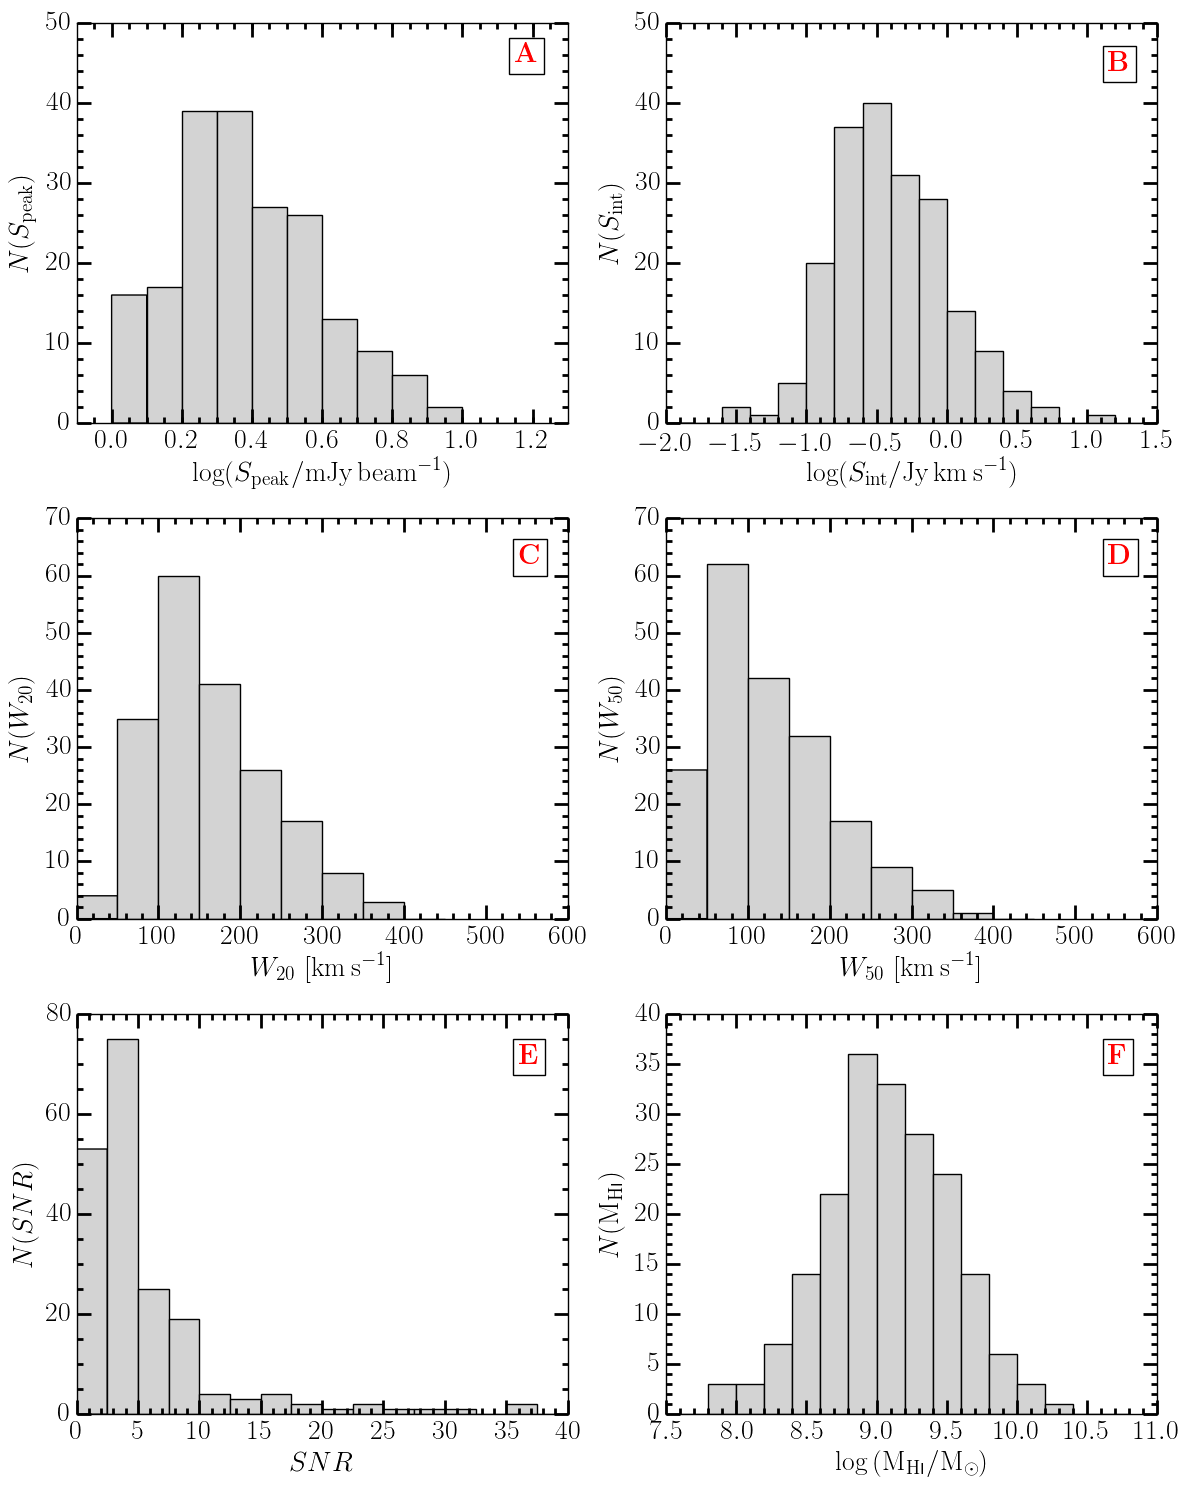

In [7]:
FourHist(visual,'visual','FourHistVisual1.pdf','lightgrey',1)
#FourHist(automated,'automated','FourHistAutomated1.pdf','lightgrey',1)
#FourHist(srt_sofia[srt_sofia.Mass>7.5],'automated','FourHistAutomated_SRT.pdf','lightgrey',1)

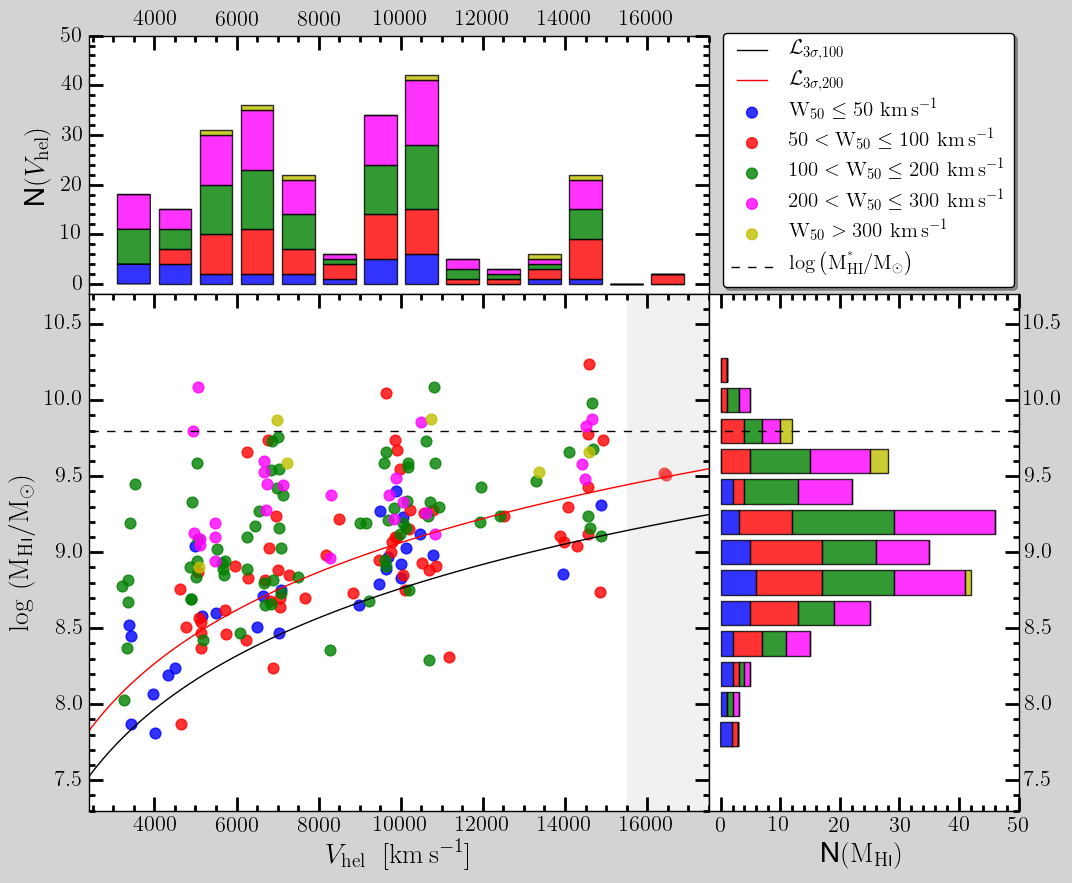

In [8]:
Sensi_w50_bined(visual,'o',60,"Visual_stacked_W50.pdf",V_color,'yes',60,0)
#*Sensi_w50_bined(SemiAutomated,'o',60,"SA_stacked_W50.pdf",SA_color,'yes',60,0)
#Sensi_w50_bined(srt_sofia[srt_sofia.Mass>7.5],'*',150,"srt_sofia_stacked_W50.pdf",SoFiA_color,'yes',60,0)
#Sensi_w50_bined(automated,'*',150,"automated_stacked_W50.pdf",SoFiA_color,'yes',60,0)

In [9]:
def Sensi_two(VWSA_F,VNSA,SANV,filename,Color):
    f=13
    ff=15
    s=50
    J=1
    nrow,ncol=3.8,3.3
    fig = plt.figure(figsize=(8,5),facecolor='lightgray') 
    gs = gridspec.GridSpec(1, 2,wspace=0.0, hspace=0.0, width_ratios=[4,2])
    ax  = plt.subplot(gs[0,0])
    ax1 = plt.subplot(gs[0,1])
    
    minorLocatorx = AutoMinorLocator()
    minorLocatory = AutoMinorLocator()
    minorLocatorx1 = AutoMinorLocator()
    minorLocatory1 = AutoMinorLocator()
    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)
    ax.scatter(VWSA_F.vel,VWSA_F.Mass,s=s,marker=r'.',c=Color[0],edgecolors=Color[0],label=r'$\mathrm{S \in (V-SA)}$')
    ax.scatter(VNSA.vel,VNSA.Mass,s=s,marker='.',c=Color[1],edgecolors=Color[1],label=r'$\mathrm{S \notin (V-SA)}$')
    ax.scatter(SANV.vel,SANV.Mass,s=s,marker='.',c=Color[2],edgecolors=Color[2],label=r'$\mathrm{(V-SA) \notin S}$')

    ax.plot(Velo1,Mass1,'k',label=r'$\mathcal{L}_{3\sigma,100}$')
    ax.plot(Velo,Mass,'r',label=r'$\mathcal{L}_{3\sigma,200}$')
    ax.set_xlim(2.4e3,17e3)
    ax.set_ylim(7.5,10.5)
    ax.tick_params(direction='in', width=1, colors='k',which='both')
    ax.tick_params(which='major',length=6,labelsize=11)
    ax.tick_params(which='minor', length=3)
    ax.set_xlabel(r'$V_\mathrm{hel}\,\,\ \mathrm{[km\,s^{-1}]}$',fontsize=ff)
    ax.set_ylabel(r'$\log \,\left(\mathrm{M}_{\mathrm{H}\textsc{i}}/\mathrm{M}_\odot \right)$',fontsize=ff)
    ax.axvspan(15.5e3,18e3,0,12, color='lightgray', alpha=0.1, lw=0)
    #ax.set_xticks(np.arange(2e3,18e3, 2e3))
    
    plt.rcParams['legend.scatterpoints'] = 1
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    
    ############################START########################
    X = [VWSA_F.Mass,VNSA.Mass,SANV.Mass]
    B=np.histogram(np.hstack(X), bins=np.arange(7.4,10.4,0.2))[1]
    ax1.hist(X,histtype='bar',stacked=True,color=Color,orientation='horizontal',bins=B,alpha=1)
    ax1.set_xlim(-2,50)
        
    ############################END########################

    ax1.yaxis.tick_right()
    ax1.set_ylim(7.5,10.5)
    ax1.tick_params(direction='in', width=1, colors='k',which='both')
    ax1.tick_params(which='major',length=6,labelsize=11)
    ax1.tick_params(which='minor', length=2)
    ax1.set_xlabel(r'N$(\mathrm{M}_{\mathrm{H}\textsc{i}})$',fontsize=ff)
    ax1.tick_params(axis='both',which='minor')
    ax1.xaxis.set_minor_locator(minorLocatorx1)
    ax1.yaxis.set_minor_locator(minorLocatory1)
    ax1.hlines(9.8, -5, 100, colors=u'k', linestyles='--')
    ax.hlines(9.8, 0, 18e3, colors=u'k', linestyles='--', label=r'$\log\left(\mathrm{M^{^*}_{HI}/M_\odot}\right)$')
    
    ax.legend(loc='upper center', bbox_to_anchor=(.75,1.205),ncol=4, fancybox=True, shadow=True,fontsize=11.5)
    plt.gcf().subplots_adjust(top=.8)
    plt.savefig(dir1+filename)
    plt.show()

## Discussion plots



In [10]:
%matplotlib inline
def StraightlineFit(m,x,c):
    return m*x+c


def CoordCheck(VWA,AWV,kind,filename,marker,s,a):
    f=18
    tickfont = 13
    #s=10
    w=1.5
    ff=12
    clr='k'   #VnSA_color
    
    
    fig = plt.figure(figsize=(8,10))
    #ax,ax1,ax2  = fig.add_subplot(222),fig.add_subplot(223),fig.add_subplot(224)
    
    gs = gridspec.GridSpec(2,2,hspace=.2,wspace=.3,height_ratios=[4,8],width_ratios=[2,2])

    ax =fig.add_subplot(gs[0,0])
    ax1=fig.add_subplot(gs[0,1])
    ax2=fig.add_subplot(gs[1,:])
    
    
    
    ax.scatter(VWA.l,AWV.l,s=s,c=clr,label=r'$\ell$',marker=marker,alpha=a,edgecolor='none')
    ax.set_xticks(np.arange(l[0],l[1]+.5, 1.))
    ax.set_yticks(np.arange(l[0],l[1]+.5, 1.))
    ax.tick_params(direction='in', width=w, colors='k',which='both')
    ax.tick_params(which='major',length=8,labelsize=tickfont)
    ax.tick_params(which='minor', length=4)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    #m,c=curve_fit(StraightlineFit,VWA.l,AWV.l)[0]
    m,c,r, p, std =stats.linregress(VWA.l,AWV.l)
    x = np.linspace(l[0],l[1],100)
    y = m*x+c
    ax.plot(x,y,'r',label='$m ='+str(round(m,3))+'$\n$='+str(round(c,3))+'$')
    ax.set_xlim(l[0],l[1])
    ax.set_ylim(l[0],l[1])
    #ax.legend(loc='best',fontsize=ff,scatterpoints=1)
    ax.text(159.3,162.2,'$m ='+str(format(m,'.3f'))+'\pm'+str(format(std,'.3f'))+'$\n $c='+str(format(c,'.3f'))+'$',bbox=dict(edgecolor='k',facecolor='lightgray', alpha=.3),fontsize=13)

    ax1.scatter(VWA.b,AWV.b,s=s,c=clr,marker=marker,alpha=a,edgecolor='none')
    ax1.set_xticks(np.arange(b[0],b[1]+.5,1.))
    ax1.set_yticks(np.arange(b[0],b[1]+.5,1.))
    ax1.tick_params(direction='in', width=w, colors='k',which='both')
    ax1.tick_params(which='major',length=8,labelsize=tickfont)
    ax1.tick_params(which='minor', length=4)
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    #m,c=curve_fit(StraightlineFit,VWA.b,AWV.b)[0]
    m,c,r, p, std =stats.linregress(VWA.b,AWV.b)
    x = np.linspace(b[0],b[1],50)
    y = m*x+c
    ax1.plot(x,y,'r-',label='Slope$ ='+str(round(m,3))+'$\n Y-intercept$='+str(round(c,3))+"$")
    ax1.set_xlim(b[0],b[1])
    ax1.set_ylim(b[0],b[1])
    #ax1.legend(loc='best',fontsize=ff,scatterpoints=1)
    ax1.text(-.7,2.2,'$m ='+str(format(m,'.3f'))+'\pm'+str(format(std,'.3f'))+'$\n $c='+str(format(c,'.3f'))+'$',bbox=dict(edgecolor='k',facecolor='lightgray', alpha=.3),fontsize=13)

    ax2.scatter(VWA.vel,AWV.vel,s=2*s,c=clr,marker=marker,alpha=a,edgecolor='none')
    ax2.set_xticks(np.arange(v[0],v[1]+4e3,2e3))
    ax2.set_yticks(np.arange(v[0],v[1]+4e3,2e3))
    ax2.tick_params(direction='in', width=w, colors='k',which='both')
    ax2.tick_params(which='major',length=8,labelsize=tickfont)
    ax2.tick_params(which='minor', length=4)
    ax2.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.xaxis.set_minor_locator(AutoMinorLocator())
    m,c,r, p, std =stats.linregress(VWA.vel,AWV.vel)
    x = np.linspace(v[0],v[1],1e3)
    y = m*x+c
    ax2.plot(x,y,'r-',label='$m ='+str(round(m,3))+'$\n$ c='+str(round(c,3))+'$')
    ax2.set_xlim(v[0],v[1])
    ax2.set_ylim(v[0],v[1])
    #ax2.legend(loc='best',fontsize=ff,scatterpoints=1)
    ax2.text(2.4e3,16.2e3,'$m ='+str(format(m,'.3f'))+'\pm'+str(format(std,'.3f'))+'$\n $c='+str(format(c,'.3f'))+'$',bbox=dict(edgecolor='k',facecolor='lightgray', alpha=.3),fontsize=13)
    ax2.axvspan(15.5e3,18e3,0,12, color='lightgray', alpha=0.3, lw=0)
    
    if kind == 'VnSoFiA':
        ax.set_xlabel(r'$\ell_{\mathrm{Visual}}\,\,[\deg]$',fontsize=f)
        ax.set_ylabel(r'$\ell_{\mathrm{SoFiA}}\,\,[\deg]$',fontsize=f)
        ax1.set_xlabel(r'$b_{\mathrm{Visual}}\,\,[\deg]$',fontsize=f)
        ax1.set_ylabel(r'$b_{\mathrm{SoFiA}}\,\,[\deg]$',fontsize=f)
        ax2.set_xlabel(r'$V_{\mathrm{rad,Visual}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax2.set_ylabel(r'$V_{\mathrm{rad,SoFiA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
    elif kind == 'VnSA':
        ax.set_xlabel(r'$\ell_{\mathrm{Visual}}\,\,[\deg]$',fontsize=f)
        ax.set_ylabel(r'$\ell_{\mathrm{SA}}\,\,[\deg]$',fontsize=f)
        ax1.set_xlabel(r'$b_{\mathrm{Visual}}\,\,[\deg]$',fontsize=f)
        ax1.set_ylabel(r'$b_{\mathrm{SA}}\,\,[\deg]$',fontsize=f)
        ax2.set_xlabel(r'$V_{\mathrm{rad,Visual}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax2.set_ylabel(r'$V_{\mathrm{rad,SA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f) 
        
    elif kind == 'SoFiAnSA':
        #ax2.scatter(SWSA_outliers.vel,SAWS_outliers.vel,s=s+5,c='r',edgecolor='none')
        
        ax.set_xlabel(r'$\ell_{\mathrm{SoFiA}}\,\,[\deg]$',fontsize=f)
        ax.set_ylabel(r'$\ell_{\mathrm{SA}}\,\,[\deg]$',fontsize=f)
        ax1.set_xlabel(r'$b_{\mathrm{SoFiA}}\,\,[\deg]$',fontsize=f)
        ax1.set_ylabel(r'$b_{\mathrm{SA}}\,\,[\deg]$',fontsize=f)
        ax2.set_xlabel(r'$V_{\mathrm{rad,SoFiA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax2.set_ylabel(r'$V_{\mathrm{rad,SA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)

    #plt.tight_layout(w_pad=1,h_pad=1)
    plt.savefig(dir1+filename)
    plt.show()
    
#CoordCheck(VWSA,SAWV,'VnSA','VnSA_Coord1.pdf')


from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

def ParameterdCheck(VWA,VWA_outliers,VWA_outliers1,AWV,AWV_outliers,AWV_outliers1,kind,filename,W50Outlier):#VWA_outliers,AWV_outliers
    f=18
    global tickfont
    tickfont = 15
    s=20
    w=1.5
    ff=10
    Loc ='best'
    p=1. #percentage
    clr='k'
    OutlierClr='r'
    
    fig = plt.figure(figsize=(10,8))
    ax,ax1,ax2,ax3  = fig.add_subplot(221),fig.add_subplot(222),fig.add_subplot(223),fig.add_subplot(224)
    ax.scatter(VWA.w20,AWV.w20,s=s,c=clr)
    ax.scatter(VWA_outliers.w20,AWV_outliers.w20,s=s,c=OutlierClr,edgecolor='none')
    ax.set_xticks(np.arange(w20[0],w20[1]+100, 100))
    ax.set_yticks(np.arange(w20[0],w20[1]+100, 100))
    ax.tick_params(direction='in', width=w, colors='k',which='both')
    ax.tick_params(which='major',length=6,labelsize=tickfont)
    ax.tick_params(which='minor', length=3)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    m0,c0,r0, pp0, m_err0 =stats.linregress(VWA.w20,AWV.w20)
    x = np.linspace(w20[0],w20[1],1e3)
    y = m0*x+c0
    std0,std00=VWA.w20.std(),AWV.w20.std()
    sig_w20 = (std0+std00)*.5
    ax.plot(x,y,'r-',label='$m ='+str(round(m0,3))+'$ \n $c='+str(round(c0,3))+'$')
    ax.plot(x,y+p*sig_w20,'r--',label='$m ='+str(round(m0,3))+'$ \n $c='+str(round(c0,3))+'$')
    ax.plot(x,y-p*sig_w20,'r--',label='$m ='+str(round(m0,3))+'$ \n $c='+str(round(c0,3))+'$')
    ax.set_xlim(w20[0],w20[1])
    ax.set_ylim(w20[0],w20[1])
    ax.text(15,w20[1]-90,'$m ='+str(format(m0,'.3f'))+'\pm'+str(format(m_err0,'.3f'))+'$\n $c='+str(format(c0,'.3f'))+'$',bbox=dict(edgecolor='k',facecolor='lightgray', alpha=.3),fontsize=15)
        
    
    ax1.scatter(VWA.w50,AWV.w50,s=s,c=clr)
    ax1.scatter(VWA_outliers.w50,AWV_outliers.w50,s=s,c=OutlierClr,edgecolor='none') 
    ax1.set_xticks(np.arange(w50[0],w50[1]+100,100))
    ax1.set_yticks(np.arange(w50[0],w50[1]+100,100))
    ax1.tick_params(direction='in', width=w, colors='k',which='both')
    ax1.tick_params(which='major',length=6,labelsize=tickfont)
    ax1.tick_params(which='minor', length=3)
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    m1,c1,r1, pp1, m_err1 = stats.linregress(VWA.w50,AWV.w50)
    x = np.linspace(w50[0],w50[1],1e3)
    y = m1*x+c1
    std1,std11=VWA.w50.std(),AWV.w50.std()
    sig_w50 = (std1+std11)*.5
    ax1.plot(x,y,'r-',label='$m ='+str(round(m1,3))+'$ \n $c='+str(round(c1,3))+'$')
    ax1.plot(x,y+p*sig_w50,'r--',label='$m ='+str(round(m1,3))+'$ \n $c='+str(round(c1,3))+'$')
    ax1.plot(x,y-p*sig_w50,'r--',label='$m ='+str(round(m1,3))+'$ \n $c='+str(round(c1,3))+'$')
    ax1.set_xlim(w50[0],w50[1])
    ax1.set_ylim(w50[0],w50[1])
    ax1.text(15,w50[1]-80,'$m ='+str(format(m1,'.3f'))+'\pm'+str(format(m_err1,'.3f'))+'$\n $c='+str(format(c1,'.3f'))+'$',bbox=dict(edgecolor='k',facecolor='lightgray', alpha=.3),fontsize=15)



    ax2.scatter(VWA.Flux,AWV.Flux,s=s,c=clr)
    ax2.scatter(VWA_outliers.Flux,AWV_outliers.Flux,s=s,c=OutlierClr,edgecolor='none')
    ax2.set_xticks(np.arange(flux[0],flux[1]+2,2))
    ax2.set_yticks(np.arange(flux[0],flux[1]+2,2))
    ax2.tick_params(direction='in', width=w, colors='k',which='both')
    ax2.tick_params(which='major',length=6,labelsize=tickfont)
    ax2.tick_params(which='minor', length=3)
    ax2.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.xaxis.set_minor_locator(AutoMinorLocator())
    
    if kind == 'VnSA':
        m2,c2,r2, pp2, m_err2 = stats.linregress(VWSA1.Flux,SAWV1.Flux)
        std2,std22=VWSA1.Flux.std(),SAWV1.Flux.std()
    elif kind == 'SoFiAnSA':
        m2,c2,r2, pp2, m_err2 = stats.linregress(SWSA1.Flux,SAWS1.Flux)
        std2,std22=SWSA1.Flux.std(),SAWS1.Flux.std()
    elif kind == 'VnSoFiA':
        m2,c2,r2, pp2, m_err2 = stats.linregress(VWSA1.Flux,SAWV1.Flux)
        std2,std22=VWSA1.Flux.std(),VWSA1.Flux.std()
       
    x = np.linspace(flux[0],flux[1],100)
    y = m2*x+c2
    sig_flux = (std2+std22)*.5
    
    ax2.plot(x,y,'r-',label='$m ='+str(round(m2,3))+'$ \n $c='+str(round(c2,3))+'$')
    ax2.plot(x,y+p*sig_flux,'r--',label='$m ='+str(round(m2,3))+'$ \n $c='+str(round(c2,3))+'$')
    ax2.plot(x,y-p*sig_flux,'r--',label='$m ='+str(round(m2,3))+'$ \n $c='+str(round(c2,3))+'$')
    
    axins = zoomed_inset_axes(ax2, 2.3, loc=4)
    axins.scatter(VWA.Flux,AWV.Flux,c=clr)
    axins.scatter(VWA_outliers.Flux,AWV_outliers.Flux,c='r',edgecolor='none')
    axins.set_xlim(-.1,2.)
    axins.set_ylim(-.1,2.)
    #axins.set_xticklabels([])
    #axins.set_yticklabels([])
    mark_inset(ax2, axins, loc1=1, loc2=4, fc="none", ec="0.6")
    axins.plot(x,y,'r-',label='$m ='+str(round(m2,3))+'$ \n $c='+str(round(c2,3))+'$')
    axins.plot(x,y+p*sig_flux,'r--')
    axins.plot(x,y-p*sig_flux,'r--')
    axins.xaxis.tick_top()
    axins.set_xticks(np.arange(0,3,1))
    axins.set_yticks(np.arange(0,3,1))
    axins.tick_params(direction='in', width=w, colors='k',which='both')
    axins.tick_params(which='major',length=6,labelsize=tickfont)
    axins.tick_params(which='minor', length=3)
    axins.yaxis.set_minor_locator(AutoMinorLocator())
    axins.xaxis.set_minor_locator(AutoMinorLocator())
    
    
    ax2.set_xlim(flux[0]-.5,flux[1])
    ax2.set_ylim(flux[0]-.5,flux[1])
    ax2.text(0,flux[1]-2.,'$m ='+str(format(m2,'.3f'))+'\pm'+str(format(m_err2,'.3f'))+'$\n $c='+str(format(c2,'.3f'))+'$',bbox=dict(edgecolor='k',facecolor='lightgray', alpha=.3),fontsize=15)



    ax3.scatter(VWA.Mass,AWV.Mass,s=s,c=clr)
    ax3.scatter(VWA_outliers.Mass,AWV_outliers.Mass,s=s,c=OutlierClr,edgecolor='none')
    ax3.set_xticks(np.arange(mass[0],mass[1]+.5,.5))
    ax3.set_yticks(np.arange(mass[0],mass[1]+.5,.5))
    ax3.tick_params(direction='in', width=w, colors='k',which='both')
    ax3.tick_params(which='major',length=6,labelsize=tickfont)
    ax3.tick_params(which='minor', length=3)
    ax3.yaxis.set_minor_locator(AutoMinorLocator())
    ax3.xaxis.set_minor_locator(AutoMinorLocator())
    m3,c3,r3, pp3, m_err3 = stats.linregress(VWA.Mass,AWV.Mass)
    x = np.linspace(mass[0],mass[1],100)
    y = m3*x+c3
    std3,std33=VWA.Mass.std(),AWV.Mass.std()
    sig_mass = (std3+std33)*.5
    ax3.plot(x,y,'r-',label='$m ='+str(round(m3,3))+'$ \n $c='+str(round(c3,3))+'$')
    ax3.plot(x,y+p*sig_mass,'r--',label='$m ='+str(round(m3,3))+'$ \n $c='+str(round(c3,3))+'$')
    ax3.plot(x,y-p*sig_mass,'r--',label='$m ='+str(round(m3,3))+'$ \n $c='+str(round(c3,3))+'$')
    ax3.set_xlim(mass[0],mass[1])
    ax3.set_ylim(mass[0],mass[1])
    #ax3.legend(loc=Loc,fontsize=ff,scatterpoints=1)
    ax3.text(7.65,10.38,'$m ='+str(format(m3,'.3f'))+'\pm'+str(format(m_err3,'.3f'))+'$\n $c='+str(format(c3,'.3f'))+'$',bbox=dict(edgecolor='k',facecolor='lightgray', alpha=.3),fontsize=15)

    
    if kind == 'VnSoFiA':
        ax.set_xlabel(r'$W_{\mathrm{20,Visual}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax.set_ylabel(r'$W_{\mathrm{20,SoFiA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax1.set_xlabel(r'$W_{\mathrm{50,Visual}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax1.set_ylabel(r'$W_{\mathrm{50,SoFiA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax2.set_xlabel(r'$S_{\mathrm{int,Visual}}\,\,[\mathrm{Jy\,km\,s^{-1}}]$',fontsize=f)
        ax2.set_ylabel(r'$S_{\mathrm{int,SoFiA}}\,\,[\mathrm{Jy\,km\,s^{-1}}]$',fontsize=f)
        ax3.set_xlabel(r'$\log(M_{\mathrm{HI}}/\mathrm{M_\odot})_{\mathrm{Visual}}$',fontsize=f)
        ax3.set_ylabel(r'$\log(M_{\mathrm{HI}}/\mathrm{M_\odot})_{\mathrm{SoFiA}}$',fontsize=f)
        #fig.text(0.37,-0.01,r'(b) Visual \& fully automated ($\textsc{SoFiA}$)',fontsize=13)
        
    elif kind == 'VnSA':
        ax.set_xlabel(r'$W_{\mathrm{20,Visual}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax.set_ylabel(r'$W_{\mathrm{20,SA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax1.set_xlabel(r'$W_{\mathrm{50,Visual}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax1.set_ylabel(r'$W_{\mathrm{50,SA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax2.set_xlabel(r'$S_{\mathrm{int,Visual}}\,\,[\mathrm{Jy\,km\,s^{-1}}]$',fontsize=f)
        ax2.set_ylabel(r'$S_{\mathrm{int,SA}}\,\,[\mathrm{Jy\,km\,s^{-1}}]$',fontsize=f)
        ax3.set_xlabel(r'$\log(M_{\mathrm{HI}}/\mathrm{M_\odot})_{\mathrm{Visual}}$',fontsize=f)
        ax3.set_ylabel(r'$\log(M_{\mathrm{HI}}/\mathrm{M_\odot})_{\mathrm{SA}}$',fontsize=f)
        #fig.text(0.37,-0.01,r'(a) Visual \& semi-automated (SA)',fontsize=13)
        
    elif kind == 'SoFiAnSA':
        ax.set_xlabel(r'$W_{\mathrm{20,SoFiA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax.set_ylabel(r'$W_{\mathrm{20,SA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax1.set_xlabel(r'$W_{\mathrm{50,SoFiA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax1.set_ylabel(r'$W_{\mathrm{50,SA}}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax2.set_xlabel(r'$S_{\mathrm{int,SoFiA}}\,\,[\mathrm{Jy\,km\,s^{-1}}]$',fontsize=f)
        ax2.set_ylabel(r'$S_{\mathrm{int,SA}}\,\,[\mathrm{Jy\,km\,s^{-1}}]$',fontsize=f)
        ax3.set_xlabel(r'$\log(M_{\mathrm{HI}}/\mathrm{M_\odot})_{\mathrm{SoFiA}}$',fontsize=f)
        ax3.set_ylabel(r'$\log(M_{\mathrm{HI}}/\mathrm{M_\odot})_{\mathrm{SA}}$',fontsize=f)
        #fig.text(0.35,-0.01,r'(c) Fully automated (\textsc{SoFiA}) \& semi-automated (SA)',fontsize=13)
    
    if W50Outlier=='Yes':
        ax.scatter(VWA_outliers1.w20,AWV_outliers1.w20,s=s,c='b',edgecolor='none')
        ax1.scatter(VWA_outliers1.w50,AWV_outliers1.w50,s=s,c='b',edgecolor='none')
        axins.scatter(VWA_outliers1.Flux,AWV_outliers1.Flux,c='b',edgecolor='none')
        ax2.scatter(VWA_outliers1.Flux,AWV_outliers1.Flux,s=s,c='b',edgecolor='none')
        ax3.scatter(VWA_outliers1.Mass,AWV_outliers1.Mass,s=s,c='b',edgecolor='none')
        
    plt.tight_layout()
    plt.savefig(dir1+filename,bbox_inches="tight")
    plt.show()
#ParameterdCheck(VWSA,VWSA_outliers,VWSA_outliers1,SAWV,SAWV_outliers,SAWV_outliers1,'VnSA','VnSA_Par1.pdf','Yes') #Done


def Sensi_triple(Visual,VWSA,SemiAutomated,SAWV,marker,s,filename,color,color1,color2):
    
    vnsa_idx=visual.index.drop(VWSA.index)
    VNSA=visual[visual.index.isin(vnsa_idx)]

    sanv_idx=SemiAutomated.index.drop(SAWV.index)
    SANV=SemiAutomated[SemiAutomated.index.isin(sanv_idx)]
    
    nrow,ncol=3.8,3.3
    fig = plt.figure(figsize=(10,10),facecolor='lightgray') 
    gs = gridspec.GridSpec(2, 2,
         wspace=0.0, hspace=0.0, 
         top=1.-0.8/(nrow+1), bottom=0.8/(nrow+1), 
         left=0.8/(ncol+1), right=1-0.5/(ncol+1),height_ratios=[2,4],width_ratios=[4,2])
    ax0 = plt.subplot(gs[0,0])
    ax  = plt.subplot(gs[1,0])
    ax1 = plt.subplot(gs[1,1])
    
    
    minorLocatorx = AutoMinorLocator()
    minorLocatory = AutoMinorLocator()
    minorLocatorx1 = AutoMinorLocator()
    minorLocatory1 = AutoMinorLocator()
    minorLocatorx0 = AutoMinorLocator()
    minorLocatory0 = AutoMinorLocator()
    
    
    
    ax.scatter(VWSA.vel,VWSA.Mass,s=s,alpha=1,marker=marker,color=color1,edgecolors='k',label='Cross-Matches')
    ax.scatter(SANV.vel,SANV.Mass,s=s,alpha=1,marker=marker,color=color2,edgecolors='k',label='SA Only')
    ax.scatter(VNSA.vel,VNSA.Mass,s=s,alpha=1,marker=marker,color=color,edgecolors='k',label='Visual Only')
    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)
    ax.plot(Velo1,Mass1,'k--',label=r'$3\sigma }$ Detection'+'\n'+'Threshold ')
    ax.set_xlim(2.4e3,17e3)
    ax.set_ylim(7.25,10.4)
    ax.tick_params(direction='in', length=6, width=1, colors='k')
    ax.set_xlabel(r'$\mathrm{V_{rad}\,\,\ [km\,s^{-1}]}$',fontsize=f)
    ax.set_ylabel(r'$\log \,\left(\mathrm{{M_{HI}}/{M_{\odot}}} \right)$',fontsize=f)
    ax.locator_params(axis='both', nbins=8)
    
    
    Y = [VWSA.vel,VNSA.vel,SANV.vel]
    BB=np.histogram(np.hstack((VWSA.vel,VNSA.vel,SANV.vel)), bins=10)[1]
    Color = (color1,color2,color)
    ax0.hist(Y,histtype='stepfilled',stacked=True,color=Color,orientation='vertical',bins=BB,alpha=1)
    ax0.xaxis.tick_top()
    ax0.set_ylim(-5,60)
    ax0.set_xlim(2.4e3,17e3)
    ax0.tick_params(direction='in', length=6, width=1, colors='k')
    ax0.locator_params(axis='both', nbins=8)
    ax0.set_ylabel(r'$\mathrm{N(V_{rad})}$',fontsize=f)
    ax0.tick_params(axis='both',which='minor')
    ax0.xaxis.set_minor_locator(minorLocatorx0)
    ax0.yaxis.set_minor_locator(minorLocatory0)
    
    
    
    X = [VWSA.Mass,VNSA.Mass,SANV.Mass]
    B=np.histogram(np.hstack((VWSA.Mass,VNSA.Mass,SANV.Mass)), bins=10)[1]
    
    
    ax1.hist(X,histtype='stepfilled',stacked=True,color=Color,orientation='horizontal',bins=B,alpha=1)
    ax1.yaxis.tick_right()
    ax1.set_ylim(7.25,10.4)
    ax1.set_xlim(-5,60)
    ax1.tick_params(direction='in', length=6, width=1, colors='k')
    ax1.locator_params(axis='both', nbins=8)
    ax1.set_xlabel(r'$\mathrm{N(M_{HI})}$',fontsize=f)
    ax1.tick_params(axis='both',which='minor')
    ax1.xaxis.set_minor_locator(minorLocatorx1)
    ax1.yaxis.set_minor_locator(minorLocatory1)
    
    plt.rcParams['legend.scatterpoints'] = 1
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.52,1.44),ncol=1, fancybox=True, shadow=True,fontsize=13)
    #plt.savefig(dir1+filename)
    plt.show()

def NonCrossMatch(visual,VWSA,SemiAutomated,SAWV):
    vnsa_idx=visual.index.drop(VWSA.index)
    VNSA=visual[visual.index.isin(vnsa_idx)]

    sanv_idx=SemiAutomated.index.drop(SAWV.index)
    SANV=SemiAutomated[SemiAutomated.index.isin(sanv_idx)]
    return VNSA,SANV


In [11]:
mtptlib.mathtext.SHRINK_FACTOR = .9
#Visual & Semi-automated
VWSA=visual[:174]
VWSA=VWSA.rename(columns={'SourceID':'name'})

SemiAutomated=SemiAutomated.rename(columns={'Name':'name','mass':'Mass'})
SAWV=SemiAutomated[:174]
#SAWV=SAWV.rename(columns={'Name':'name','mass':'Mass'})

#Catalogues with outliers
SAWV_F = SAWV
VWSA_F = VWSA

#Outliers
index=[13,23,59,108,119,142,117,145,91] # outlier in w20
VWSA_outliers = VWSA[VWSA.index.isin(index)]
SAWV_outliers = SAWV[SAWV.index.isin(index)]

index1=[42,76,114] #42,76,114 outlier in w50
VWSA_outliers1 = VWSA[VWSA.index.isin(index1)]
SAWV_outliers1 = SAWV[SAWV.index.isin(index1)]

#without outliers
Index=index+index1
idx  = SAWV.index.drop(Index)
VWSA = VWSA[VWSA.index.isin(idx)]
SAWV = SAWV[SAWV.index.isin(idx)]

#Calculate slope and intercept within 2Jy km/s 
idx=SAWV[SAWV.Flux<=4].index
SAWV1=SAWV[SAWV.index.isin(idx)]
VWSA1=VWSA[VWSA.index.isin(idx)]

l,b,v =[159,163],[-1,3],[2e3,18e3] #visual & Sofia bounds
w20,w50,flux,mass=[0,500],[0,500],[0,12],[7.5,11.] #visual &Semi-automated

#%matplotlib inline
#CoordCheck(VWSA,SAWV,'VnSA','VnSA_Coord1.pdf','o',20,1.)
#ParameterdCheck(VWSA,VWSA_outliers,VWSA_outliers1,SAWV,SAWV_outliers,SAWV_outliers1,'VnSA','VnSA_Par1.pdf','Yes') #Done


AWV=automated[automated.CP.str.startswith('Y')]
match = AWV.CP.values
n=AWV.CP.size
VWA = pd.DataFrame(columns=Vsorted.columns)
for i in range(n):
    VWA.loc[i] = Vsorted.loc[int(match[i][-3:])].values
VWA=VWA.rename(columns={'mass':'Mass'})#'SourceID':'name',

VWAF = VWA
AWVF = AWV

#Outliers in vel
v1_outliers = [53,59,62]  #vwa=53,59,62, awv=78,84,88
v2_outliers = [78,84,88]

#Visual & SoFiA: source to remove
#VWA1=VWA[VWA.index!=62] #Visual with SoFiA/Automated
#AWV1=AWV[AWV.index!=88]    #SoFiA/Automated with Visual
VWA_index=[56,39,57,20,5,75,1,45,79,41] #No outliers in w50
VWA_outliers = VWA[VWA.index.isin(VWA_index)]
VWA_outliers1 = VWA[VWA.index==72]

AWV_index=[81,61,82,28,8,103,2,70,110,66] #Outliers in w20
AWV_outliers = AWV[AWV.index.isin(AWV_index)] #No outliers in w50
AWV_outliers1 = AWV[AWV.index==99]

#without outliers
VWA_idx  = VWA.index.drop(v1_outliers)
VWA_idx1  = VWA_idx.drop(VWA_index)
VWA_idx2  = VWA_idx1.drop(72)
VWA = VWA[VWA.index.isin(VWA_idx2)]

AWV_idx  = AWV.index.drop(v2_outliers)
AWV_idx1  = AWV_idx.drop(AWV_index)
AWV_idx2  = AWV_idx1.drop(99)
AWV = AWV[AWV.index.isin(AWV_idx2)]
w20,w50,flux,mass=[0,600],[0,400],[0,12],[7.5,11.] #visual &sofia bounds


#Catalogues with outliers
VWA_F = VWAF[VWAF.index.isin(VWA_idx)]
AWV_F = AWVF[AWVF.index.isin(AWV_idx)]
#CoordCheck(VWA,AWV,'VnSoFiA','VnSoFiA_Coord1.pdf','o',20,1.)
#ParameterdCheck(VWA,VWA_outliers,VWA_outliers1,AWV,AWV_outliers,AWV_outliers1,'VnSoFiA','VnSoFiA_Par1.pdf','Yes') #Done

a,b = Degrees(VWA_F,'visual')
VWA_F['ra'],VWA_F['dec']=a,b
snr=SNR(VWA_F)
VWA_F['snr'] = snr


#Semi-Automated & SoFiA
SAWSoFiA = pd.DataFrame(columns=SemiAutomated.columns)
SoFiAWSA = pd.DataFrame(columns=automated.columns)
DATA = open('/Volumes/Themba/MSc/SoFiA_Dec/SoFiAnSA_CM','r').readlines()
for i in range(99):
    if i==26 or i==64:
        pass
    else:
        index = DATA[i]
        s = index.split()
        sofia_index,SA_index = int(s[0])-1,int(s[-1])-1
        #print i,sofia_index,SA_index
    
        SAWSoFiA.loc[i] = SemiAutomated.loc[SA_index].values
        SoFiAWSA.loc[i] = automated.loc[sofia_index].values

SAWSoFiA = SAWSoFiA.rename(columns={'Name':'name','mass':'Mass'})
## SoFiA & Semi-automated
SAWS=SAWSoFiA[SAWSoFiA.index!=84]  #Same-automated with Sofia.  THIS SOURCE IS MATCHED WITH A NONE-MATCH
SWSA=SoFiAWSA[SoFiAWSA.index!=84]  #Sofia with Same-automateD.  SOFIA HAS DUPLICATE 

SAWSF = SAWS
SWSAF = SWSA

#Velocity outliers
v_outlier = [23,61,65,94]

idx_w20 = [47,1,5,59,20,41,43,75,79,27,83]   #69,51,61 W50 outliers
idx_w50 = [69,51]
SAWS_outliers  = SAWS[SAWS.index.isin(idx_w20)]
SAWS_outliers1 = SAWS[SAWS.index.isin(idx_w50)]
SWSA_outliers  = SWSA[SWSA.index.isin(idx_w20)]
SWSA_outliers1 = SWSA[SWSA.index.isin(idx_w50)]

idx  = idx_w20+idx_w50
idx0 = SWSA.index.drop(v_outlier)
idx1 = idx0.drop(idx)
SWSA = SWSA[SWSA.index.isin(idx1)]
SAWS = SAWS[SAWS.index.isin(idx1)]
w20,w50,flux,mass=[0,600],[0,500],[0,12],[7.5,11.] # Sofia & Semi-automated bounds

IDX = SAWS[SAWS.Flux>4.].index
ix  = SWSA.index.drop(IDX)
SWSA1 = SWSA[SWSA.index.isin(ix)]
SAWS1 = SAWS[SAWS.index.isin(ix)]

#CoordCheck(SWSA,SAWS,'SoFiAnSA','SoFiAnSA_Coord1.pdf')
SWSA_F = SWSAF[SWSAF.index.isin(idx0)]
SAWS_F = SAWSF[SAWSF.index.isin(idx0)]


VNSA,SANV=NonCrossMatch(visual,VWSA_F,SemiAutomated,SAWV_F)
VNA,ANV=NonCrossMatch(visual,VWA_F,automated,AWV_F)

sans_idx=SemiAutomated.index.drop(SAWS_F.index)
SANS=SemiAutomated[SemiAutomated.index.isin(sans_idx)]

names = SWSA_F.name
idx=automated.index[automated.name.isin(names)]
new_idx = automated.index.drop(idx)
SNSA = automated[automated.index.isin(new_idx)]

/Users/themba/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/themba/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
def Sensi_tripleB(VWSA,SAWV,marker,s,filename,kind,color1,color2,color3):
    f=12
    edg='k'
    fontsize=legend_size = 13
    tickfont=12
    
    fig = plt.figure(figsize=(6,10),facecolor='lightgray') 
    gs = gridspec.GridSpec(nrows=3, ncols=1,wspace=0.0, hspace=0.0)
    ax0 = plt.subplot(gs[0,0])
    ax  = plt.subplot(gs[1,0])
    ax1 = plt.subplot(gs[2,0])
        
    
    if kind == 'VnSA':
        ax0.scatter(VWSA.vel,VWSA.Mass,s=s,alpha=1,marker=marker,color=color1,edgecolors=edg,label=r'$\mathrm{V\,\in \, SA}$')
        ax.scatter(VNSA.vel,VNSA.Mass,s=s,alpha=1,marker=marker,color=color2,edgecolors=edg,label=r'$\mathrm{V\,\notin \, SA}$')
        ax1.scatter(SANV.vel,SANV.Mass,s=s,alpha=1,marker=marker,color=color3,edgecolors=edg,label=r'$\mathrm{SA\,\notin \, V}$')

    elif kind == 'VnSOFIA':
        ax0.scatter(VWSA.vel,VWSA.Mass,s=s,alpha=1,marker=marker,color=color1,edgecolors=edg,label=r'$\mathrm{V\,\in \, A}$')
        ax.scatter(VNA.vel,VNA.Mass,s=s,alpha=1,marker=marker,color=color2,edgecolors=edg,label=r'$\mathrm{V\, \notin\, A}$')
        ax1.scatter(ANV.vel,ANV.Mass,s=s,alpha=1,marker=marker,color=color3,edgecolors=edg,label=r'$\mathrm{A\,\notin \, V}$')
    
    elif kind == 'SoFiAnSA':
        ax0.scatter(VWSA.vel,VWSA.Mass,s=s,alpha=1,marker=marker,color=color1,edgecolors=edg,label=r'$\mathrm{A\,\in \, SA}$')
        ax.scatter(SNSA.vel,SNSA.Mass,s=s,alpha=1,marker=marker,color=color2,edgecolors=edg,label=r'$\mathrm{A\, \notin\, SA}$')
        ax1.scatter(SANS.vel,SANS.Mass,s=s,alpha=1,marker=marker,color=color3,edgecolors=edg,label=r'$\mathrm{SA\,\notin \, A}$')
    
    ax0.axvspan(15.5e3,18e3,0,12, color='lightgray', alpha=0.3, lw=0)
    ax0.xaxis.set_minor_locator(AutoMinorLocator())
    ax0.yaxis.set_minor_locator(AutoMinorLocator())
    ax0.plot(Velo1,Mass1,'k')
    ax0.plot(Velo,Mass,'r')
    ax0.set_xlim(2.4e3,17e3)
    ax0.set_ylim(7.25,10.4)
    ax0.tick_params(direction='in', length=6, width=1, colors='k',labelsize=tickfont)
    ax0.set_xlabel(r'$\mathrm{V_{rad}\,\,\ [km\,s^{-1}]}$',fontsize=f)
    ax0.set_ylabel(r'$\log \,\left(\mathrm{{M_{HI}}/{M_{\odot}}}\right)$',fontsize=f)
    ax0.xaxis.tick_top()
    ax0.locator_params(axis='both', nbins=8)
    ax0.legend(loc=4,fontsize=legend_size)
    
    ax.axvspan(15.5e3,18e3,0,12, color='lightgray', alpha=0.3, lw=0)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.plot(Velo1,Mass1,'k')
    ax.plot(Velo,Mass,'r')
    ax.set_xlim(2.4e3,17e3)
    ax.set_ylim(7.25,10.4)
    ax.tick_params(direction='in', length=6, width=1, colors='k',labelsize=tickfont)
    ax.set_xlabel(r'$\mathrm{V_{rad}\,\,\ [km\,s^{-1}]}$',fontsize=f)
    ax.set_ylabel(r'\log \,\left(\mathrm{{M_{HI}}/{M_{\odot}}} \right)$',fontsize=f)
    ax.locator_params(axis='both', nbins=8)
    ax.legend(loc=4,fontsize=legend_size)
    
    ax1.axvspan(15.5e3,18e3,0,12, color='lightgray', alpha=0.3, lw=0)
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.plot(Velo1,Mass1,'k')
    ax1.plot(Velo,Mass,'r')
    ax1.set_xlim(2.4e3,17e3)
    ax1.set_ylim(7.25,10.4)
    ax1.tick_params(direction='in', length=6, width=1, colors='k',labelsize=tickfont)
    ax1.set_xlabel(r'$\mathrm{V_{rad}\,\,\ [km\,s^{-1}]}$',fontsize=f)
    ax1.set_ylabel(r'$\log \,\left(\mathrm{{M_{HI}}/{M_{\odot}}}\right)$',fontsize=f)
    ax1.locator_params(axis='both', nbins=8)
    ax1.legend(loc=4,fontsize=legend_size)
    plt.savefig(dir1+filename)
    #plt.show()

#Sensi_tripleB(VWSA_F,SAWV_F,'o',30,'SAnVisual_Sens1.pdf','VnSA',VnSA_color,V_color,SA_color)
#Sensi_tripleB(VWA_F,AWV_F,'o',30,'VisualnSofia_Sens1.pdf','VnSOFIA',VnSA_color,V_color,Automated_Color)
#Sensi_tripleB(SWSA_F,SAWS_F,'o',30,'SofiAnSA_Sens1.pdf','SoFiAnSA',VnSA_color,Automated_Color,SA_color)


deltaS = (6*u.arcsec).to(u.deg)
a,a1,a2,a3,a4=(deltaS).value,(deltaS*5).value,(deltaS*7).value,(deltaS*10).value,(deltaS*20).value
deltaV = 200

def CM(SWSA,VWSA,a3,deltaV):
    J1=SWSA[['l','b','vel']]
    J2=VWSA[['l','b','vel']]
    cm = 0 #nummber of counterparts
    global J1_indexes,J2_indexes
    J1_indexes = []
    J2_indexes = []
    for i in range(J1.l.size):
        for j in range(J2.l.size):
            dl,db,dv = J1.iloc[i] - J2.iloc[j]
            
            if abs(dl)<=a3 and abs(db)<=a3 and abs(dv)<=deltaV:
                #print 'NO.',i,j
                #print '-----------------------'
                cm += 1
                J1_indexes.append(i)
                J2_indexes.append(j)
                #print SWSA[i:i+1].name
                #print VWSA[j:j+1]
                #print '----------END-------------'
            else:
                pass
    print 'cm='+str(cm)
    return J1_indexes,J2_indexes

#J1_indexes,J2_indexes=CM(srt_sofia,visual,a2,200)
#J1_indexes,J2_indexes=CM(srt_sofia,automated,a2,300)

#CM(AWV_F,VWSA_F,300)
#CM(SWSA_F,VWSA_F,a3,200)  #1,11,12,13,18,19,20,24,25,28,29,32,34,35,37,38,:: AWV_F & VWSA_F==91
#CM(AWV_F,VWSA_F,200)  #1,11,12,13,18,19,20,24,25,28,29,32,34,35,37,38,:: AWV_F & VWSA_F==91
#CM(automated,VWSA_F,a2,200)

#for index in J2_indexes:
#    count = J2_indexes.count(index)
#    if count >1:
#        print index,' occurs ',count,' times.'

### Uncertanities


\begin{eqnarray}
u \left( S_{_{peak}} \right) &=& \sqrt{\sigma^2_{_{rms}} + \left(\frac{S_{_{peak}}}{20} \right)^2}\hspace{4.7cm} \mathrm{(Barnes \, et \, al.\, 2001)}\\\\
u(S_{_{int}}) &=&\left(\frac{4}{SN}\right) \sqrt{\left(S_{_{peak}}S_{_{int}}\right) \delta v}\hspace{3.5cm} \mathrm{(Koribalski\, et \, al.\,  2004)}\\\\
u(V_{_{sys}})&=& \left(\frac{3}{SN}\right) \sqrt{\left(\frac{W_{_{20}}-W_{_{50}}}{2}\right) \delta v} \hspace{2.5cm} \mathrm{(Koribalski\, et \, al.\,  2004)}\\\\
u(W_{_{20}}) &=& 3 u(V_{_{sys}}) \,\,\,\,\,\& \,\,\,\,\, u(W_{_{50}})= 4 u(V_{_{sys}})  \hspace{2cm} \mathrm{(Schneider \,et\, al.\, 1986)}\\\\
\end{eqnarray}

In [13]:
def U_Speak(visual,SNR):
    S_peak = visual.Peak
    if SNR=='SoFiA':
        x = np.sqrt(sigma**2 + ((S_peak*1e3)/20.)**2)
    else:
        x = np.sqrt(sigma**2 + (S_peak/20.)**2)
    return x

def U_Fint(visual,SNR):
    S_int = visual.Flux
    S_peak = visual.Peak
    if SNR=='peak':
        SN = S_peak/sigma  #peak signal to noise
        x = (4./SN)*np.sqrt(S_peak*1e-3*S_int)
        
    elif SNR=='int':
        SN = S_int/sig_int         #integrated signal to noise
        x = (4./SN)*np.sqrt(S_peak*1e-3*S_int)
    elif SNR=='SoFiA':
        SN = visual.snr_int
        x = (4./SN)*np.sqrt(S_peak*S_int)
    
    return x

def U_Vsys(visual,SNR):
    if SNR=='peak':
        SN = visual.Peak/sigma  #peak signal to noise
    elif SNR=='int':
        SN = visual.Flux/sig_int         #integrated signal to noise
    elif SNR=='SoFiA':
        SN = visual.snr_int
    x = (3./SN)*np.sqrt((dv*(visual.w20-visual.w50))/2.)
    return x
sigma=0.40
dv=8.24
sig_int = np.sqrt(sigma*1e-3*dv)



def Errors(visual,SNR_Type):
    visual['u_peak']=U_Speak(visual,SNR_Type)
    visual['u_peak']=visual.u_peak.round(2)
    visual['u_Flux']=U_Fint(visual,SNR_Type)
    visual['u_Flux']=visual.u_Flux.round(3)
    visual['u_vel']=U_Vsys(visual,SNR_Type)
    visual['u_vel'] = visual.u_vel.round(0)
    visual['u_w20']=3*visual.u_vel
    visual['u_w50']=4*visual.u_vel
    if SNR_Type == 'SoFiA':
        visual['Peak']=1e3*visual.Peak
        
#Errors('peak')
#Errors(visual,'int')

#RA = []
#for names in visual.SourceID:
#    RA.append(names[1:10] 
#visual['ra'] = RA
#SORTED_VISUAL=visual.sort(columns='ra')
#visual_sorted  = SORTED_VISUAL.drop(['ra','z'],1)
#visual_sorted.to_csv('../Catalogue/FINAL_PRODUCT/Visual_Feb',sep='\t', encoding='utf-8',index=False)


RA = []
for names in automated.name:
    RA.append(names[1:10]) 
    
automated['ra'] = RA
SORTED_automated=automated.sort(columns='ra')
automated_sorted  = SORTED_automated.drop(['ra'],1)
automated_sorted.to_csv('../Catalogue/FINAL_PRODUCT/automated_Feb',sep='\t', encoding='utf-8',index=False)



#unsorted_sofia = open('sofia_matches','r').readlines()
#V_M,SA_M,Name = [],[],[]
#for n in unsorted_sofia:
#    a= n.split()
#    Name.append(a[0])
#    V_M.append(a[1])
#    SA_M.append(a[-1])
#    #print a

#JJ=automated_sorted.name.values
#JJJ = list(JJ)

#for name in JJJ:
#    i = Name.index(name)
#    print Name[i]+' '+V_M[i]+' '+SA_M[i]

/Users/themba/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/themba/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:69: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [14]:
#TWM = visual[:174]
#MWT = SemiAutomated[:174]
def Diff_Par(TWM,MWT,par,filename):
    B=6
    s=10
    f=15
    ff=13
    nrow,ncol=4,4
    fig = plt.figure(figsize=(6,4),facecolor='lightgray') 
    ax  = fig.add_subplot(111) 
    
    minorLocatorx = AutoMinorLocator()
    minorLocatory = AutoMinorLocator()

    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)
    ax.tick_params(direction='in', length=6, width=1, colors='k',labelsize=ff)
    ax.locator_params(axis='both', nbins=B)
    
    
    if par == "ra":
        y_diff = TWM.ra-MWT.ra
        x_diff = TWM.ra
        Mean = round(np.mean(y_diff),2)
        std = round(np.std(y_diff),2)
        ax.set_ylabel(r'$\Delta\ell\,\,\mathrm{[arcmin]}$',fontsize=f)
        ax.set_xlabel(r'$\ell_\textsc{SoFiA}\,\,\mathrm{[arcmin]}$',fontsize=f)
        ax.set_yticks(np.arange(-2, 3, .5))
        ax.set_xlim(4200,4620)
        ax.set_ylim(-1.,1.5)
        #ax.set_xticks(np.arange(2000, 17000, 4000))
        
        ax.hlines(Mean,4200,4620,colors=u'k', linestyles=u'--',label=r'$\left<\Delta\ell\right>= '+str(Mean)+'^\prime$')
        ax.hlines(Mean+std,4200,4620,colors=u'r', linestyles=u'--',label=r'$\pm \sigma ='+str(std)+'^\prime$')
        ax.hlines(Mean-std,4200,4620,colors=u'r', linestyles=u'--',label=r'')
        
    if par == "dec":
        y_diff = TWM.dec-MWT.dec
        x_diff = TWM.dec
        Mean = round(np.mean(y_diff),2)
        std = round(np.std(y_diff),2)
        
        ax.set_ylabel(r'$\Delta b\,\,\mathrm{[arcmin]}$',fontsize=f)
        ax.set_xlabel(r'$b_\textsc{SoFiA}\,\,\mathrm{[arcmin]}$',fontsize=f)
        ax.set_xticks(np.arange(2.6e3, 30e3, 5e1))
        ax.set_xlim(2.6e3, 2.87e3)
        ax.set_yticks(np.arange(-3, 3, .5))
        ax.set_ylim(-1.,1.)
        
        ax.hlines(Mean,2.6e3, 2.87e3,colors=u'k', linestyles=u'--',label=r'$\left<\Delta\ell\right>= '+str(Mean)+'0^\prime$')
        ax.hlines(Mean+std,2.6e3, 2.87e3,colors=u'r', linestyles=u'--',label=r'$\pm \sigma ='+str(std)+'^\prime$')
        ax.hlines(Mean-std,2.6e3, 2.87e3,colors=u'r', linestyles=u'--',label=r'')
        
        
    if par == "vel":
        y_diff = TWM.vel-MWT.vel
        x_diff = TWM.vel
        Mean = round(np.mean(y_diff),2)
        std = round(np.std(y_diff),2)
        
        ax.set_ylabel(r'$\Delta V_\mathrm{hel}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax.set_xlabel(r'$V_\textsc{SoFiA}\,\,[\mathrm{km\,s^{-1}}]$',fontsize=f)
        ax.set_yticks(np.arange(-200, 250, 50))
        ax.set_xticks(np.arange(2000, 17e3, 2000))
        ax.set_xlim(2000,15500)
        ax.set_ylim(-150,150)  #(-300,300)
        
        ax.hlines(Mean,2000,15500,colors=u'k', linestyles=u'--',label=r'$\left<\Delta V_\mathrm{hel}\right>= '+str(int(Mean))+'\,\,\mathrm{km\,s^{-1}}$')
        ax.hlines(Mean+std,2000,15500,colors=u'r', linestyles=u'--',label=r'$\pm \sigma ='+str(int(std))+'\,\,\mathrm{km\,s^{-1}}$')
        ax.hlines(Mean-std,2000,15500,colors=u'r', linestyles=u'--',label=r'')
    
    ax.scatter(x_diff,y_diff,s=s,alpha=1.,c='k',label='')
    plt.rcParams['legend.scatterpoints'] = 1
    plt.legend(loc=1,fontsize=12)
    plt.savefig(dir1+filename)
    plt.show()

#Diff_Par(VWSA_F,SAWV_F,'ra','VnSAra.pdf')
#Diff_Par(VWSA_F,SAWV_F,'dec','VnSAdec.pdf')
#Diff_Par(VWSA_F,SAWV_F,'vel','VnSAvel.pdf')

#Diff_Par(SWSA_F,SAWS_F,'ra','AnSAra.pdf')
#Diff_Par(SWSA_F,SAWS_F,'dec','AnSAdec.pdf')
#Diff_Par(SWSA_F,SAWS_F,'vel','AnSAvel.pdf')

#Diff_Par(SWTB,TBWS,'ra','TBnSra.pdf')
#Diff_Par(SWTB,TBWS,'dec','TBnSdec.pdf')
#Diff_Par(SWTB,TBWS,'vel','TBnSvel.pdf')

In [26]:
def Diff_ParTT(TWM,MWT,par,filename):
    B=6
    s=8
    f=14
    ff=12
    fig = plt.figure(figsize=(4,3),facecolor='lightgray') 
    ax  = fig.add_subplot(111) 
    
    minorLocatorx = AutoMinorLocator()
    minorLocatory = AutoMinorLocator()

    ax.xaxis.set_minor_locator(minorLocatorx)
    ax.yaxis.set_minor_locator(minorLocatory)
    ax.tick_params(direction='in', length=6, width=1, colors='k',labelsize=ff)
    ax.locator_params(axis='both', nbins=B)
    
    
    if par == "w20":
        y_diff = TWM.w20-MWT.w20
        x_diff = TWM.w20
        Mean = round(np.mean(y_diff),1)
        std = round(np.std(y_diff),1)
        ax.set_ylabel(r'$\Delta W_\mathrm{20}}\,\,\mathrm{[km\,s^{-1}]}$',fontsize=f)
        ax.set_xlabel(r'$W_\mathrm{20}\,\,\mathrm{[km\,s^{-1}]}$',fontsize=f)
        ax.set_ylim(-300,300)
        ax.set_xlim(0,500)
        ax.hlines(Mean,0,600,colors=u'k', linestyles=u'--',label=r'$\left<\Delta W_\mathrm{20} \right>$')
        ax.hlines(Mean+3*std,0,600,colors=u'r', linestyles=u'--',label=r'$3\sigma$')
        ax.hlines(Mean-3*std,0,600,colors=u'r', linestyles=u'--',label=r'')
        
    if par == "w50":
        y_diff = TWM.w50-MWT.w50
        x_diff = TWM.w50
        Mean = round(np.mean(y_diff),1)
        std = round(np.std(y_diff),1)
        ax.set_ylabel(r'$\Delta W_\mathrm{50}\,\,\mathrm{[km\,s^{-1}]}$',fontsize=f)
        ax.set_xlabel(r'$W_\mathrm{50}\,\,\mathrm{[km\,s^{-1}]}$',fontsize=f)
        #ax.set_xticks(np.arange(0,500,50))
        ax.set_ylim(-300,300)
        ax.set_xlim(0,500)
        ax.hlines(Mean,0,500,colors=u'k', linestyles=u'--',label=r'$\left<\Delta W_\mathrm{50}\right>$')
        ax.hlines(Mean+3*std,0,500,colors=u'r', linestyles=u'--',label=r'$\pm 3\sigma$')
        ax.hlines(Mean-3*std,0,500,colors=u'r', linestyles=u'--',label=r'')
    
    if par == "mass":
        y_diff = TWM.Mass-MWT.Mass
        x_diff = TWM.Mass
        Mean = round(np.mean(y_diff),1)
        std = round(np.std(y_diff),1)
        ax.set_ylabel(r'$\Delta \log\left({\mathrm{M}_{\mathrm{H}\textsc{i}}}/{\mathrm{M_\odot}}\right)$',fontsize=f)
        ax.set_xlabel(r'$\log\left({\mathrm{M}_{\mathrm{H}\textsc{i}}}/{\mathrm{M_\odot}}\right)$',fontsize=f)
        #ax.set_xticks(np.arange(0,500,50))
        ax.set_ylim(-1.5,1.)
        ax.set_xlim(7.5,11)
        ax.hlines(Mean,0,11,colors=u'k', linestyles=u'--',label=r'$\left<\Delta \mathrm{M}_{\mathrm{H}\textsc{i}}\right>$')
        ax.hlines(Mean+3*std,0,11,colors=u'r', linestyles=u'--',label=r'$\pm 3\sigma$')
        ax.hlines(Mean-3*std,0,11,colors=u'r', linestyles=u'--',label=r'')
        
    if par == "flux":
        y_diff = TWM.Flux-MWT.Flux
        x_diff = TWM.Flux
        Mean = round(np.mean(y_diff),1)
        std = round(np.std(y_diff),1)
        ax.set_ylabel(r'$\Delta \mathrm{S}_\mathrm{int}\,\,\mathrm{\left[Jy\,km\,s^{-1}\right]}$',fontsize=f)
        ax.set_xlabel(r'$\mathrm{S}_\mathrm{int}\,\,\mathrm{\left[Jy\,km\,s^{-1}\right]}$',fontsize=f)
        #ax.set_xticks(np.arange(0,500,50))
        ax.set_ylim(-4,4)
        ax.set_xlim(0,6)
        ax.hlines(Mean,0,11,colors=u'k', linestyles=u'--',label=r'$\left<\Delta \mathrm{S}_\mathrm{int}\right>$')
        ax.hlines(Mean+3*std,0,20,colors=u'r', linestyles=u'--',label=r'$\pm 3\sigma$')
        ax.hlines(Mean-3*std,0,20,colors=u'r', linestyles=u'--',label=r'')
    
    
    if par == "peak":
        y_diff = TWM.Peak*1e3-MWT.Peak
        x_diff = TWM.Peak*1e3
        Mean = round(np.mean(y_diff),1)
        std = round(np.std(y_diff),1)
        ax.set_ylabel(r'$\Delta \mathrm{S}_\mathrm{peak}\,\,\mathrm{\left[mJy\,beam^{-1}\right]}$',fontsize=f)
        ax.set_xlabel(r'$\mathrm{S}_\mathrm{int}\,\,\mathrm{\left[mJy\,beam^{-1}\right]}$',fontsize=f)
        #ax.set_xticks(np.arange(0,500,50))
        ax.set_ylim(-4,4)
        ax.set_xlim(0,10)
        ax.hlines(Mean,0,11,colors=u'k', linestyles=u'--',label=r'$\left<\Delta \mathrm{S}_\mathrm{peak}\right>$')
        ax.hlines(Mean+3*std,0,20,colors=u'r', linestyles=u'--',label=r'$\pm 3\sigma$')
        ax.hlines(Mean-3*std,0,20,colors=u'r', linestyles=u'--',label=r'')
    
    ax.scatter(x_diff,y_diff,s=s,alpha=1.,c='k',label='')
    plt.rcParams['legend.scatterpoints'] = 1
    plt.legend(loc=4,fontsize=10)
    plt.gcf().subplots_adjust(bottom=0.18,left=0.2)
    plt.savefig(dir1+filename)
    plt.show()
    
def ST(vv):
    return round(np.min(vv),3),round(np.max(vv),3),round(np.mean(vv),3),round(np.std(vv),4)

In [16]:
def LABEL(SAAA,VVV,ZZZ,filename,color):
    plt.figure(figsize=(10,.5))
    plt.bar(1,.5,color=color[2],width=1,alpha=a)
    plt.bar(2,.5,color=color[0],width=1,alpha=a)
    plt.bar(3,.5,color=color[1],width=1,alpha=a)
    plt.xticks([])
    plt.yticks([])
    plt.text(1.3,.2,ZZZ,fontsize=16,color='k', alpha=1,weight='bold')
    plt.text(3.3,.2,SAAA,fontsize=16,color='k', alpha=1,weight='bold')
    plt.text(2.3,.2,VVV,fontsize=16,color='k', alpha=1,weight='bold')
    plt.savefig(dir1+filename)
    plt.show()

a=.5
#VnSA_color='k'
#SA_color='lightgreen'
#VnSA = (V_color,SA_color)
#VnA  = (V_color,SoFiA_color)
#AnSA = (SoFiA_color,SA_color)
#TBnA = (SoFiA_color,'b')
#SoFiA_color = 'gray'


In [17]:
def MFlux(SANV,VWSA,VNSA,filename,color):
    f = plt.figure(figsize=(n,m))
    ax1 = f.add_subplot(111)
    X1 = [log10(VWSA.Flux),log10(VNSA.Flux),log10(SANV.Flux)]
    B1=np.histogram(np.hstack((X1)), bins=np.arange(-2.4,2,0.2))[1]
    ax1.hist(X1,histtype='bar',stacked=True,color=(color[2],color[0],color[1]),bins=B1,alpha=a)
    ax1.set_xlabel(r'$\log(S_\mathrm{int}/\mathrm{Jy\,km\,s^{-1}})$',fontsize=ff)
    ax1.set_ylabel(r'$N(S_\mathrm{int})$',fontsize=ff)
    ax1.set_ylim(0,50)
    ax1.set_xlim(-2.,1.5)
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.tick_params(direction='in', width=1.5, colors='k',which='both')
    ax1.tick_params(which='major',length=7,labelsize=L)
    ax1.tick_params(which='minor', length=4)
    #ax1.text(1.23,90,'?',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=15,color='r')
    plt.savefig(dir1+filename)
    plt.show()

    
def MSNR(SANV,VWSA,VNSA,filename,color):
    f = plt.figure(figsize=(n,m))
    ax1 = f.add_subplot(111)
    X1 = [VWSA.snr,VNSA.snr,SANV.snr]
    B1=np.histogram(np.hstack((X1)), bins=np.arange(0,50,2.5))[1]
    ax1.hist(X1,histtype='bar',stacked=True,color=(color[2],color[0],color[1]),bins=B1,alpha=a)
    ax1.set_xlabel(r'$SNR$',fontsize=ff)
    ax1.set_ylabel(r'$N(SNR)$',fontsize=ff)
    ax1.set_ylim(0,90)
    ax1.set_xlim(0,40)
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.tick_params(direction='in', width=1.5, colors='k',which='both')
    ax1.tick_params(which='major',length=7,labelsize=L)
    ax1.tick_params(which='minor', length=4)
    #ax1.text(37.,81,'?',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=15,color='r')
    plt.savefig(dir1+filename)
    plt.show()
    
    
def MW50(SANV,VWSA,VNSA,filename,color):
    f = plt.figure(figsize=(n,m))
    ax1 = f.add_subplot(111)
    X1 = [VWSA.w50,VNSA.w50,SANV.w50]
    B1=np.histogram(np.hstack((X1)), bins=np.arange(0, 500, 50))[1]
    ax1.hist(X1,histtype='bar',stacked=True,color=(color[2],color[0],color[1]),bins=B1,alpha=a)
    ax1.set_xlabel(r'$W_\mathrm{50}\,\, [\mathrm{km\,s^{-1}}]$',fontsize=ff)
    ax1.set_ylabel(r'$N(W_\mathrm{50})$',fontsize=ff)
    ax1.set_ylim(0,80)
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.tick_params(direction='in', width=1.5, colors='k',which='both')
    ax1.tick_params(which='major',length=7,labelsize=L)
    ax1.tick_params(which='minor', length=4)
    #ax1.text(418,72,'?',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=15,color='r')
    plt.savefig(dir1+filename)
    plt.show()

def MVEL(SANV,VWSA,VNSA,filename,color):
    f = plt.figure(figsize=(n,m))
    ax1 = f.add_subplot(111)
    X1 = [VWSA.vel,VNSA.vel,SANV.vel]
    B1=np.histogram(np.hstack((X1)), bins=np.arange(1e3,20e3,1e3))[1]
    ax1.hist(X1,histtype='bar',stacked=True,color=(color[2],color[0],color[1]),bins=B1,alpha=a)
    ax1.set_xlabel(r'$V_\mathrm{hel}\,\, [\mathrm{km\,s^{-1}}]$',fontsize=ff)
    ax1.set_ylabel(r'$N(V_\mathrm{hel})$',fontsize=ff)
    ax1.set_ylim(0,45)
    ax1.set_xlim(1e3,18e3)
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.tick_params(direction='in', width=1.5, colors='k',which='both')
    ax1.tick_params(which='major',length=7,labelsize=L)
    ax1.tick_params(which='minor', length=4)
    #ax1.text(16.8e3,72,'?',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=15,color='r')
    plt.savefig(dir1+filename)
    plt.show()
    

def MPEAK(SANV,VWSA,VNSA,filename,color):
    f = plt.figure(figsize=(n,m))
    ax1 = f.add_subplot(111)
    X1 = [VWSA.Peak,VNSA.Peak,SANV.Peak]
    B1=np.histogram(np.hstack((X1)), bins=np.arange(0,10,.5))[1]
    ax1.hist(X1,histtype='bar',stacked=True,color=(color[2],color[0],color[1]),bins=B1,alpha=a)
    ax1.set_xlabel(r'$S_\mathrm{peak}\,\, [\mathrm{mJy\,beam^{-1}}]$',fontsize=ff)
    ax1.set_ylabel(r'$N(S_\mathrm{peak})$',fontsize=ff)
    ax1.set_ylim(0,50)
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.tick_params(direction='in', width=1.5, colors='k',which='both')
    ax1.tick_params(which='major',length=7,labelsize=L)
    ax1.tick_params(which='minor', length=4)
    ax1.set_xticks(np.arange(0, 10, 1))
    #ax1.text(16.8e3,72,'?',bbox=dict(edgecolor='k',facecolor='none', alpha=1),fontsize=15,color='r')
    plt.savefig(dir1+filename)
    plt.show()    
    
    
ff,a=16,.5
n,m=6,5
L=15
#SA_color,V_color,VnSA_color = 'r','g','b'

In [18]:
tbws = open('/Users/themba/Documents/MSc/Thesis/Write_up/Thesis/TBWS','r').readlines()
swtb = open('/Users/themba/Documents/MSc/Thesis/Write_up/Thesis/SWTB','r').readlines()

SWTB = pd.DataFrame(columns=automated.columns)
for i in range(len(tbws)):
    name = tbws[i].split()[0]
    SWTB.loc[i] = automated[automated.name==name].values[0]

    
TBWS = pd.DataFrame(columns=VWSA_F.columns)
for i in range(len(swtb)):
    name = swtb[i].split()[0]
    TBWS.loc[i] = VWSA_F[VWSA_F.name==name].values[0]
    
IX=[]
for name in SWTB.name:
    IX.append(automated[automated.name==name].index[0])
ix=automated.index.drop(IX)
SNTB=automated[automated.index.isin(ix)]

IX1=[]
for name in TBWS.name:
    IX1.append(VWSA_F[VWSA_F.name==name].index[0])
ix1=VWSA_F.index.drop(IX1)
TBNS=VWSA_F[VWSA_F.index.isin(ix1)]

In [27]:
#SWTB.Peak

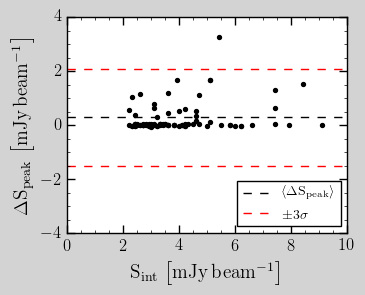

In [30]:
#SRTNV,VNSRT=NonCrossMatch(srt_sofia,SRTWV,visual,VWSRT)

#CCC =(VnSA_color,V_color,SA_color)
#Sensi_two(VWSA_F,VNSA,SANV,'VnSA_SRT.pdf',CCC)

#ST(VNSA.Mass)
#SANV[SANV.Mass<=9.0].l.size*100./SANV.Mass.size,VNSA[VNSA.Mass<=9.0].l.size*100./VNSA.Mass.size


#Diff_ParTT(VWSA_F,SAWV_F,'w20','VnSA_w20.pdf')
#Diff_ParTT(VWSA_F,SAWV_F,'w50','VnSA_w50.pdf')
#Diff_ParTT(VWSA_F,SAWV_F,'mass','VnSA_mass.pdf')
#Diff_ParTT(VWSA_F,SAWV_F,'flux','VnSA_flux.pdf')

#Diff_ParTT(SWTB,TBWS,'w20','TBnS_w20.pdf')
#Diff_ParTT(SWTB,TBWS,'w50','TBnS_w50.pdf')
#Diff_ParTT(SWTB,TBWS,'mass','TBnS_mass1.pdf')
#Diff_ParTT(SWTB,TBWS,'flux','TBnS_flux.pdf')
Diff_ParTT(SWTB,TBWS,'peak','TBnS_peak.pdf')

### TESTBED Sample and SOFIA

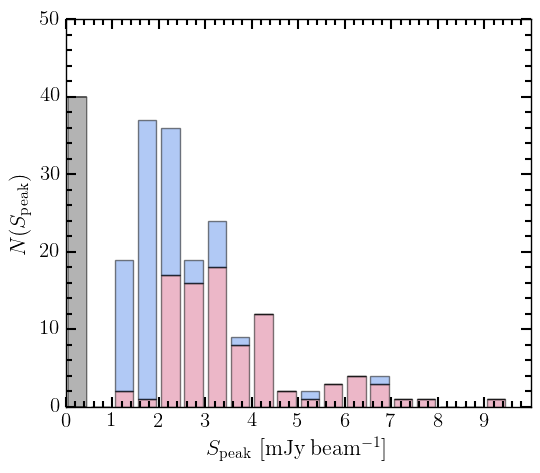

In [331]:
#VnSA=(V_color,'plum','lightblue')
#LABEL(r'$\boldsymbol{\mathrm{SA\notin V}}$',r'$\boldsymbol{\mathrm{V\notin SA}}$',r'$\boldsymbol{\mathrm{V\in SA}}$','labels.pdf',VnSA)
#MFlux(SANV,VWSA_F,VNSA,'MFlux.pdf',VnSA)
#MW50(SANV,VWSA_F,VNSA,'MW50.pdf',VnSA)
#MSNR(SANV,VWSA_F,VNSA,'MSNR.pdf',VnSA)
#MVEL(SANV,VWSA_F,VNSA,'MVEL.pdf',VnSA)

#LABEL('SOFIA','Visual','labels1.pdf',VnA)
#MFlux(VNA,VWA_F,ANV,'MFlux1.pdf',VnA)
#MW50(VNA,VWA_F,ANV,'MW501.pdf',VnA)
#MSNR(VNA,VWA_F,ANV,'MSNR1.pdf',VnA)
#MVEL(VNA,VWA_F,ANV,'MVEL1.pdf',VnA)

#LABEL('SA','SOFIA','labels2.pdf',AnSA)
#MFlux(SNSA,SWSA_F,SANS,'MFlux2.pdf',AnSA)
#MW50(SNSA,SWSA_F,SANS,'MW502.pdf',AnSA)
#MSNR(SNSA,SWSA_F,SANS,'MSNR2.pdf',AnSA)
#MVEL(SNSA,SWSA_F,SANS,'MVEL2.pdf',AnSA)

TBnA = ('dimgray','cornflowerblue','palevioletred')
#LABEL(r'$\boldsymbol{\mathrm{(V-SA)\notin S}}$',r'$\boldsymbol{\mathrm{S\notin (V-SA)}}$',r'$\boldsymbol{\mathrm{S\in (V-SA)}}$','labels3.pdf',TBnA)
#MFlux(TBNS,TBWS,SNTB,'MFlux3.pdf',TBnA)
#MW50(TBNS,TBWS,SNTB,'MW503.pdf',TBnA)
#MSNR(TBNS,TBWS,SNTB,'MSNR3.pdf',TBnA)
#MVEL(TBNS,TBWS,SNTB,'MVEL3.pdf',TBnA)
MPEAK(TBNS,TBWS,SNTB,'MPeak3.pdf',TBnA)


###### Galaxies missed by SoFiA

In [80]:
def Completeness(Type,a,b):
    if Type=='w20':
        aa,bb=SWTB[(SWTB.w20>a)&(SWTB.w20<b)].l.size,VWSA_F[(VWSA_F.w20>a)&(VWSA_F.w20<b)].l.size 
    
    if Type=='w50':
        aa,bb=SWTB[(SWTB.w50>a)&(SWTB.w50<b)].l.size,VWSA_F[(VWSA_F.w50>a)&(VWSA_F.w50<b)].l.size 
        
    if Type=='flux':
        aa,bb=SWTB[(SWTB.Flux>a)&(SWTB.Flux<b)].l.size,VWSA_F[(VWSA_F.Flux>a)&(VWSA_F.Flux<b)].l.size 
        
    if Type=='snr':
        aa,bb=SWTB[(SWTB.snr>a)&(SWTB.snr<b)].l.size,VWSA_F[(VWSA_F.snr>a)&(VWSA_F.snr<b)].l.size 
    
    if Type=='mass':
        aa,bb=SWTB[(SWTB.Mass>a)&(SWTB.Mass<b)].l.size,VWSA_F[(VWSA_F.Mass>a)&(VWSA_F.Mass<b)].l.size 
        
    C = round(aa*100./bb,1)
    return aa,bb,str(C)+'%'


def Reliability(Type,a,b):
    if Type=='w20':
        aa,bb=SWTB[(SWTB.w20>a)&(SWTB.w20<b)].l.size,(SWTB[(SWTB.w20>a)&(SWTB.w20<b)].l.size+SNTB[(SNTB.w20>a)&(SNTB.w20<b)].l.size)
    
    if Type=='w50':
        aa,bb=SWTB[(SWTB.w50>a)&(SWTB.w50<b)].l.size,(SWTB[(SWTB.w50>a)&(SWTB.w50<b)].l.size+SNTB[(SNTB.w50>a)&(SNTB.w50<b)].l.size)
    
    if Type=='flux':
        aa,bb=SWTB[(SWTB.Flux>a)&(SWTB.Flux<b)].l.size,(SWTB[(SWTB.Flux>a)&(SWTB.Flux<b)].l.size+SNTB[(SNTB.Flux>a)&(SNTB.Flux<b)].l.size)
    
    if Type=='snr':
        aa,bb=SWTB[(SWTB.snr>a)&(SWTB.snr<b)].l.size,(SWTB[(SWTB.snr>a)&(SWTB.snr<b)].l.size+SNTB[(SNTB.snr>a)&(SNTB.snr<b)].l.size)
    
    if Type=='mass':
        aa,bb=SWTB[(SWTB.Mass>a)&(SWTB.Mass<b)].l.size,(SWTB[(SWTB.Mass>a)&(SWTB.Mass<b)].l.size+SNTB[(SNTB.Mass>a)&(SNTB.Mass<b)].l.size)
    
    C = round(aa*100./bb,1)
    return aa,bb,str(C)+'%'

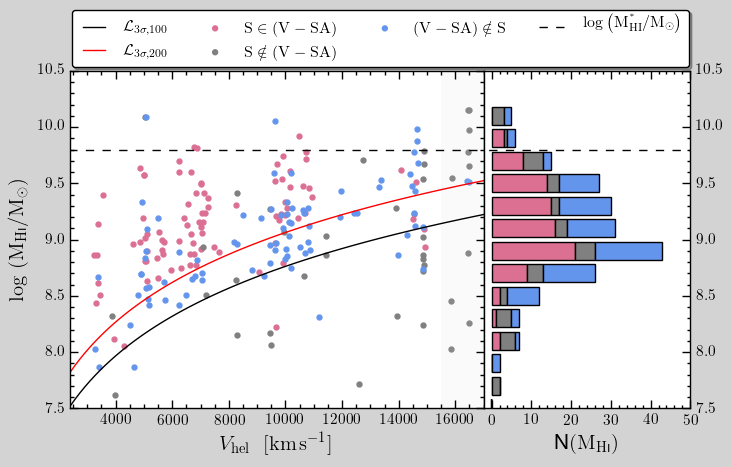

In [159]:
#TBnA1 = ('palevioletred','gray','cornflowerblue')
Sensi_two(SWTB,SNTB,TBNS,'SnTB_SRT.pdf',TBnA1)
